In [1]:
from salad.cluster import Clusters
from salad.catalog import MultiEpochDetectionCatalog
from salad.regression import regression
import matplotlib.pyplot as plt
import numpy as np

In [26]:
catalog = MultiEpochDetectionCatalog.read("../search/DEEP/20190403/A0c/detector_3/snr_5/catalog.pkl")
clusters = Clusters.read("../search/DEEP/20190403/A0c/detector_3/snr_5/clusters.pkl")

(101, 1) (101, 2)


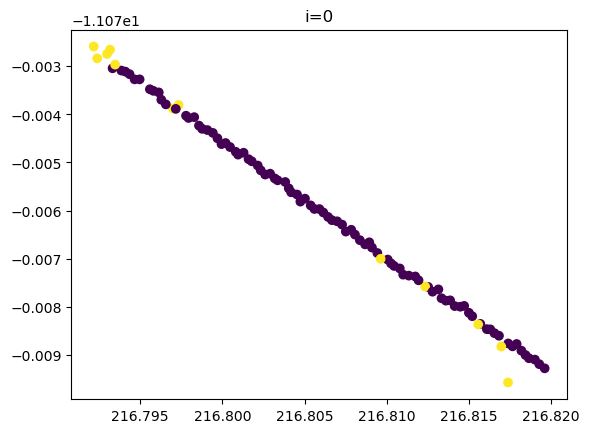

(100, 1) (100, 2)


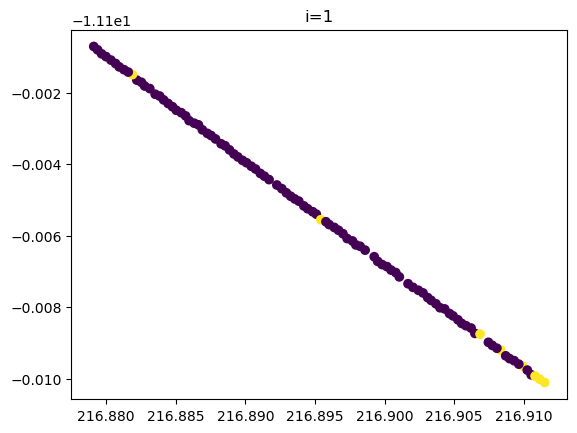

(99, 1) (99, 2)


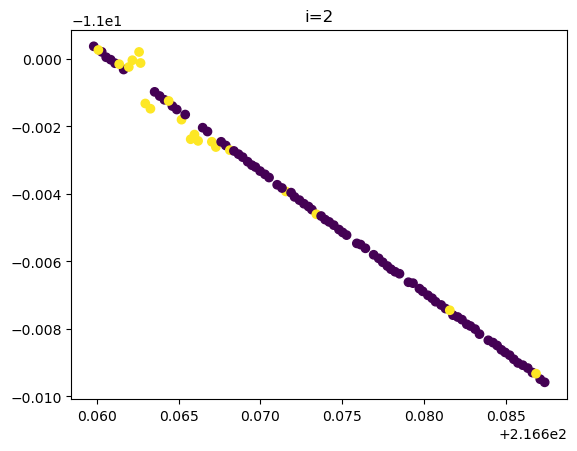

(98, 1) (98, 2)


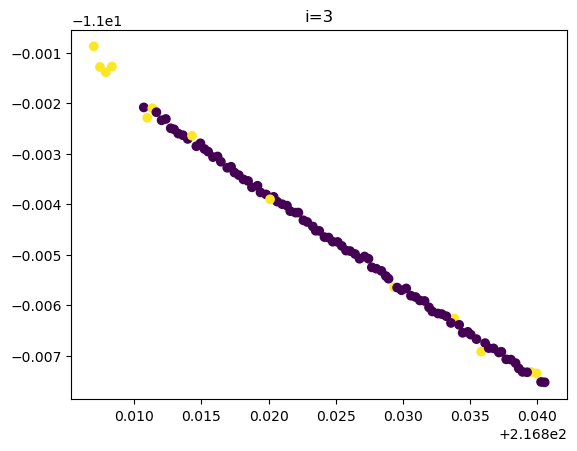

(97, 1) (97, 2)


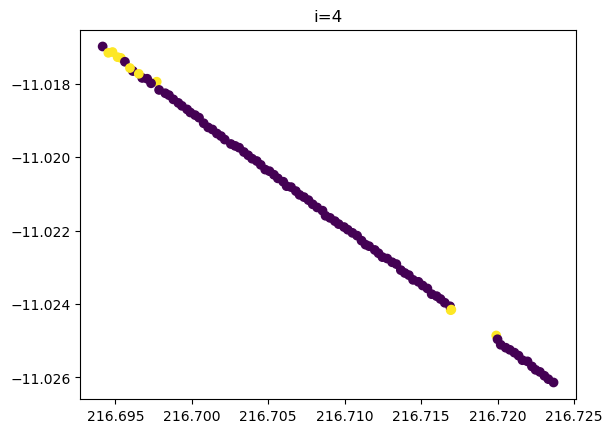

(96, 1) (96, 2)


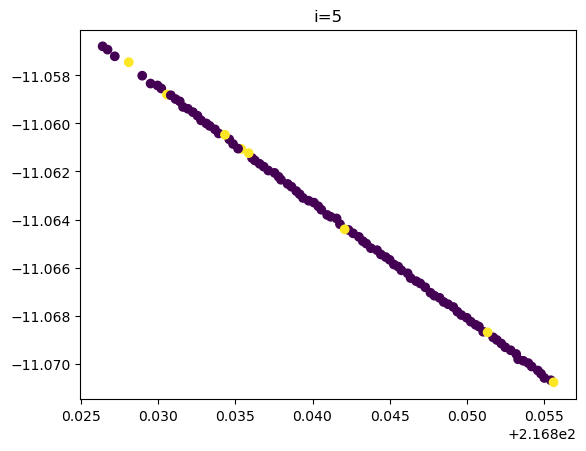

(92, 1) (92, 2)


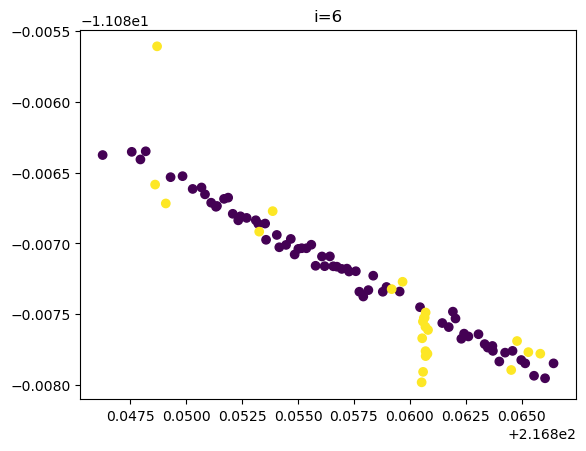

(85, 1) (85, 2)


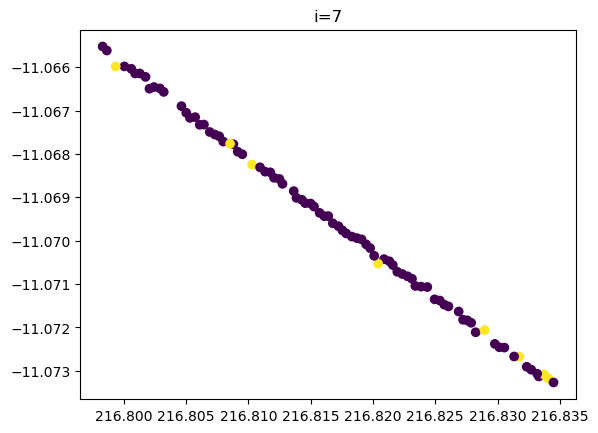

(75, 1) (75, 2)


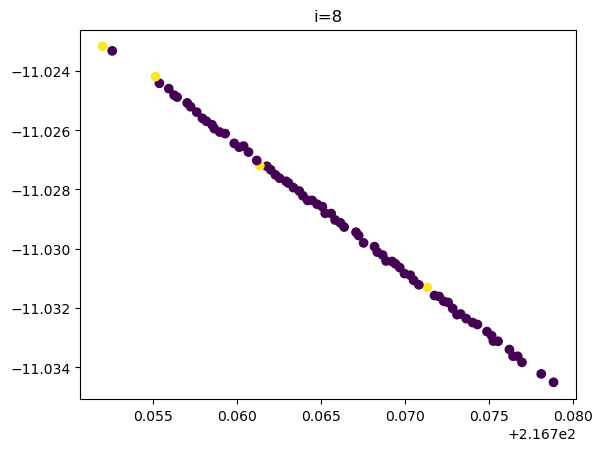

(64, 1) (64, 2)


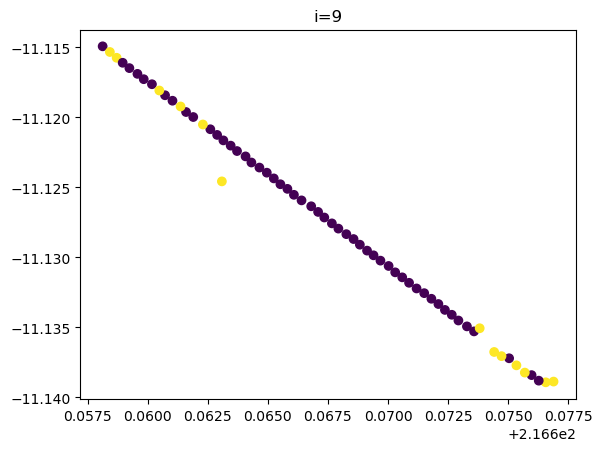

(47, 1) (47, 2)


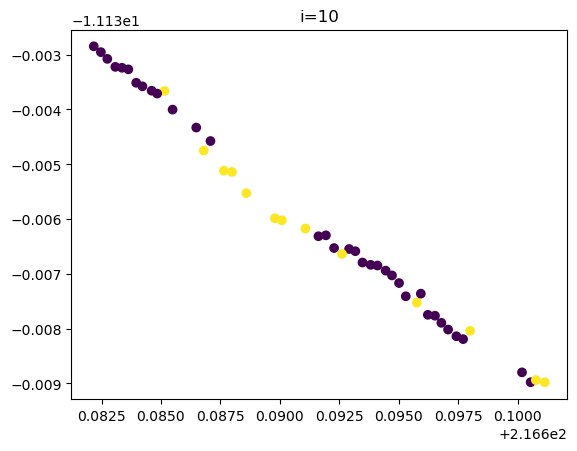

(43, 1) (43, 2)


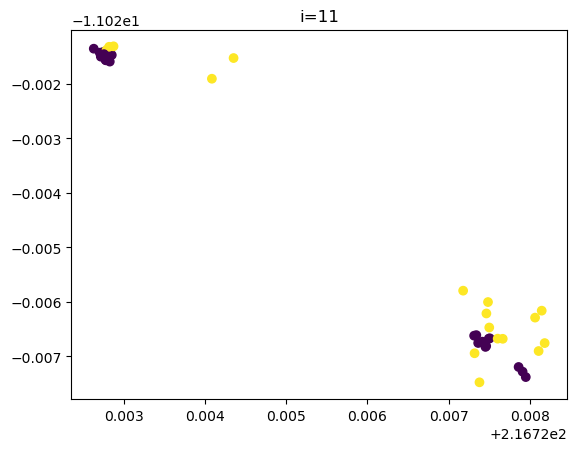

(42, 1) (42, 2)


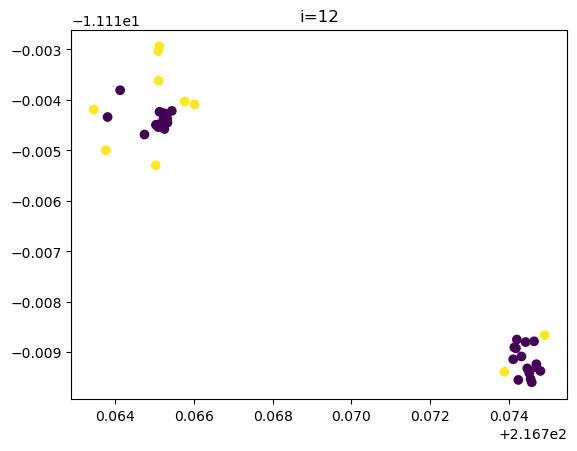

(42, 1) (42, 2)


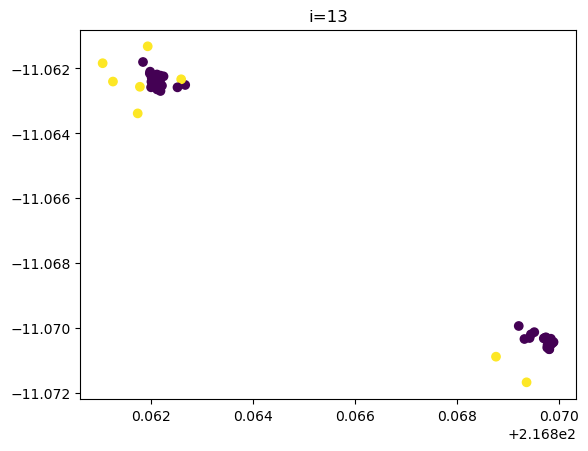

(42, 1) (42, 2)


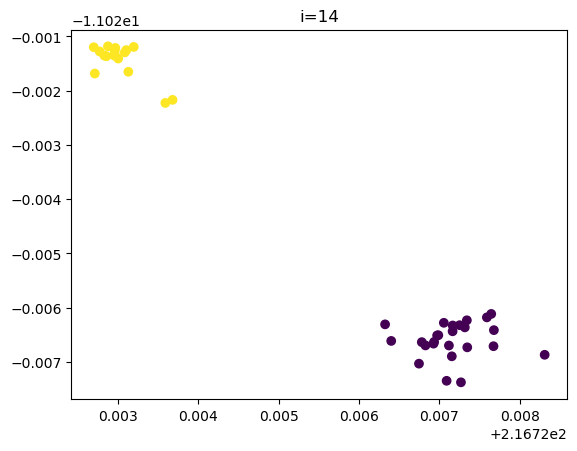

(40, 1) (40, 2)


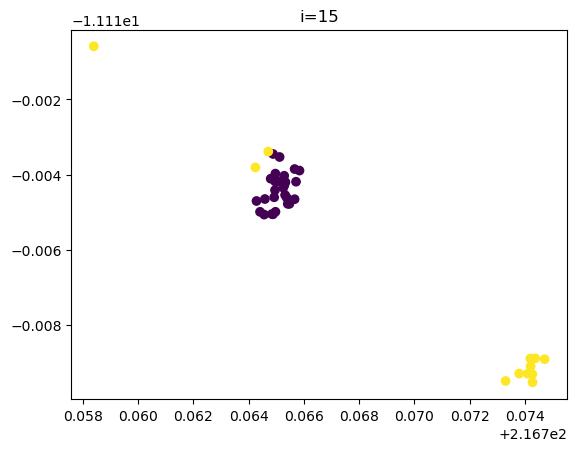

(40, 1) (40, 2)


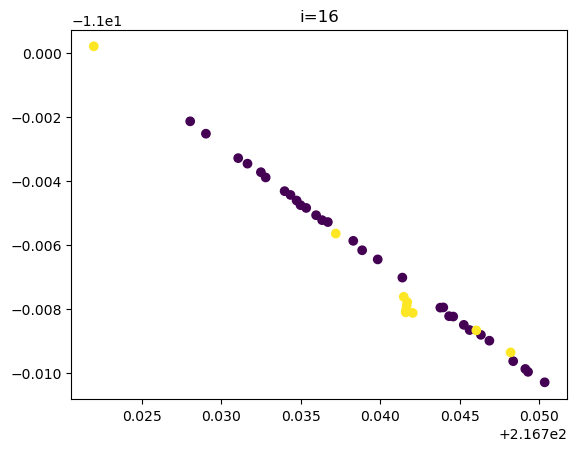

(39, 1) (39, 2)


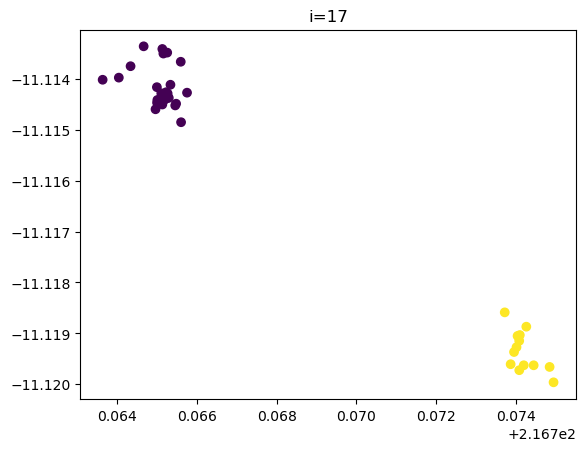

(39, 1) (39, 2)


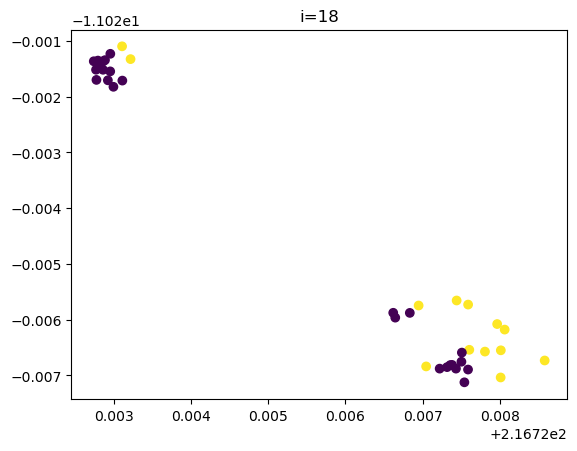

(38, 1) (38, 2)


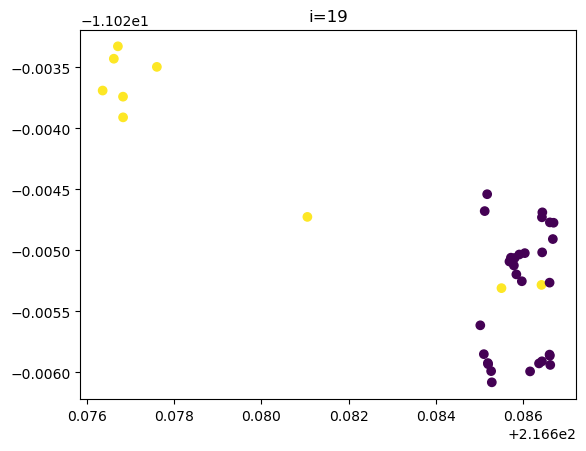

(38, 1) (38, 2)


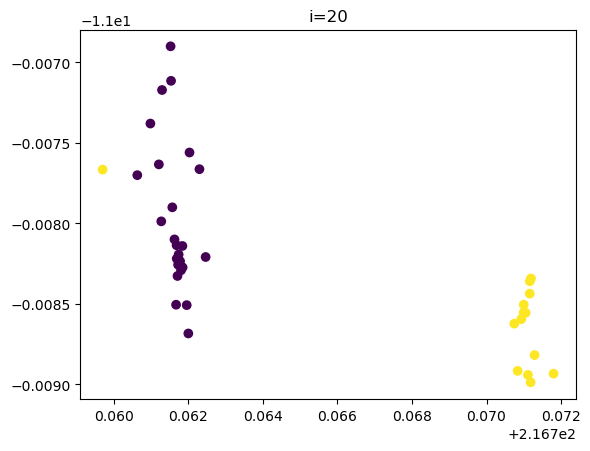

(38, 1) (38, 2)


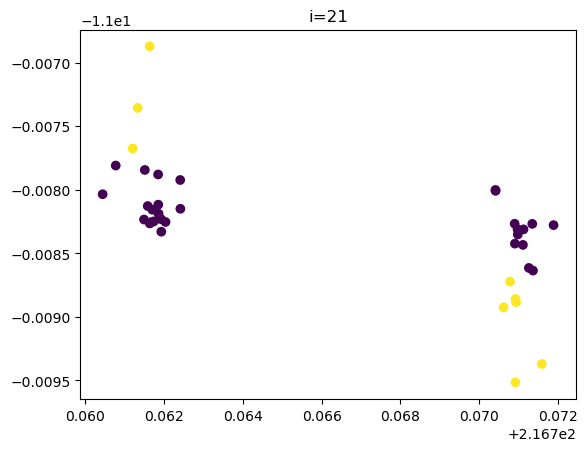

(38, 1) (38, 2)


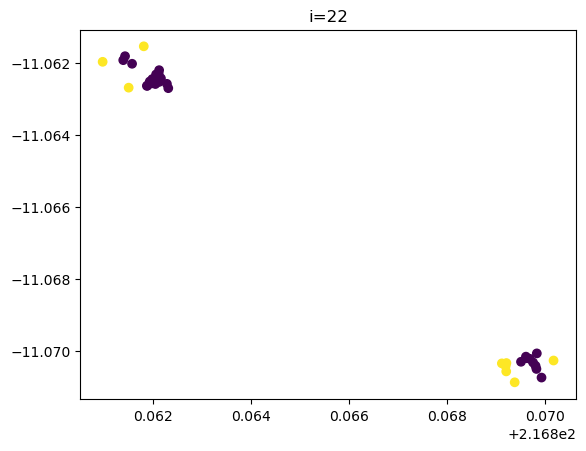

(38, 1) (38, 2)


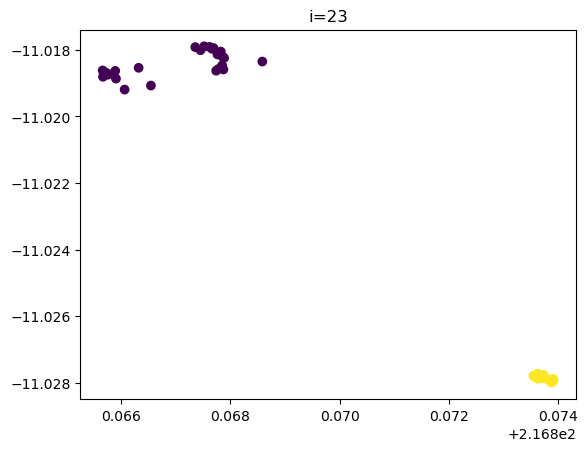

(37, 1) (37, 2)


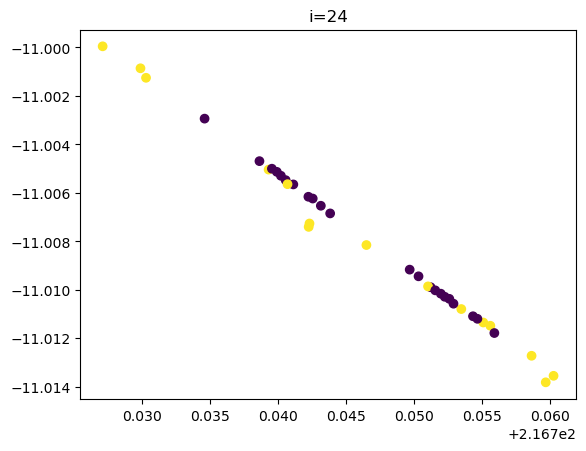

(36, 1) (36, 2)


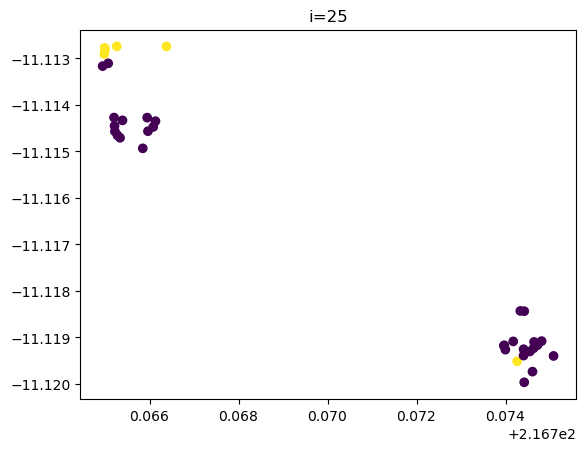

(37, 1) (37, 2)


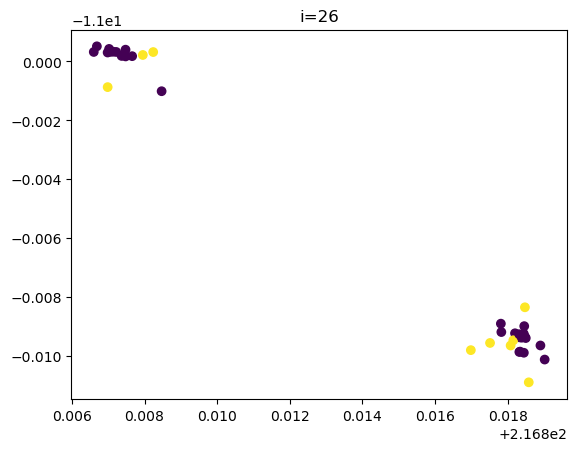

(36, 1) (36, 2)


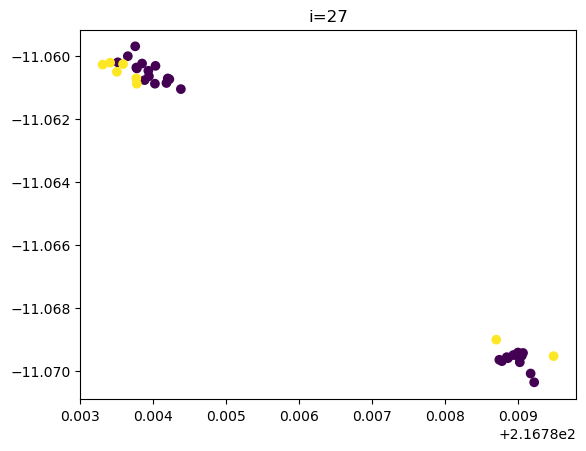

(35, 1) (35, 2)


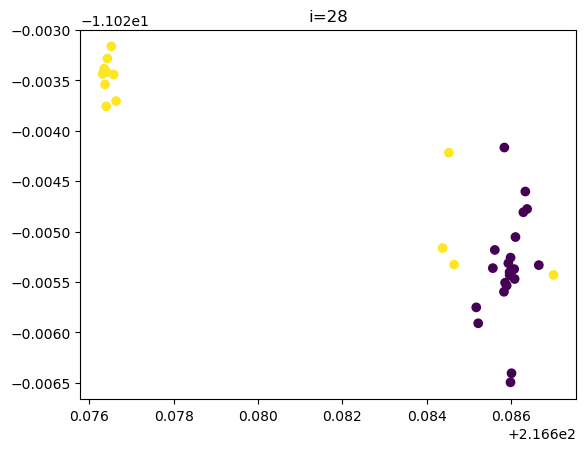

(34, 1) (34, 2)


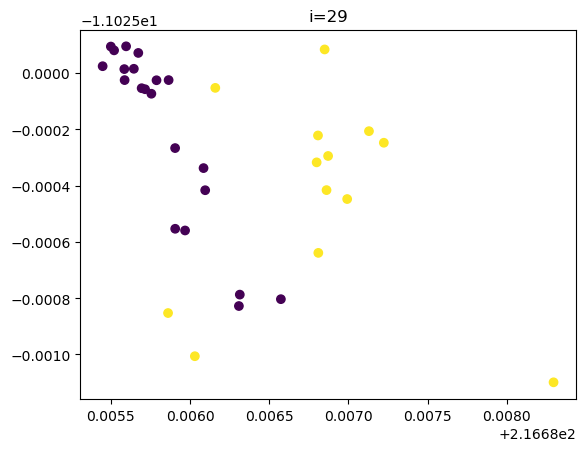

(34, 1) (34, 2)


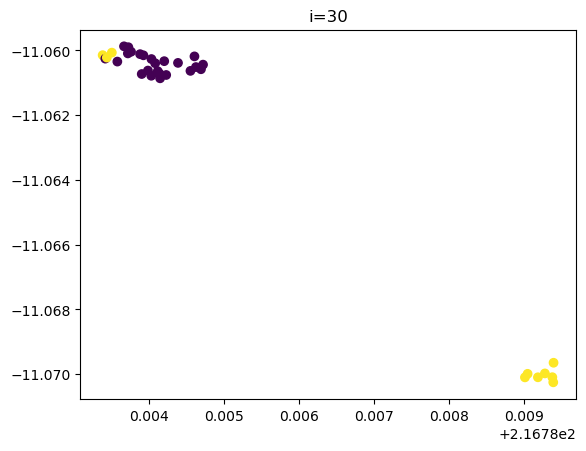

(33, 1) (33, 2)


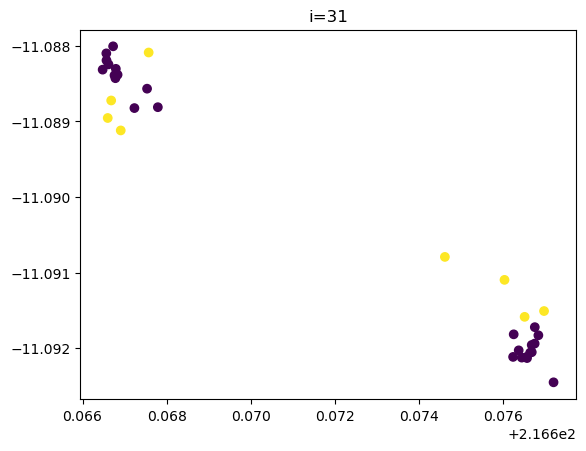

(33, 1) (33, 2)


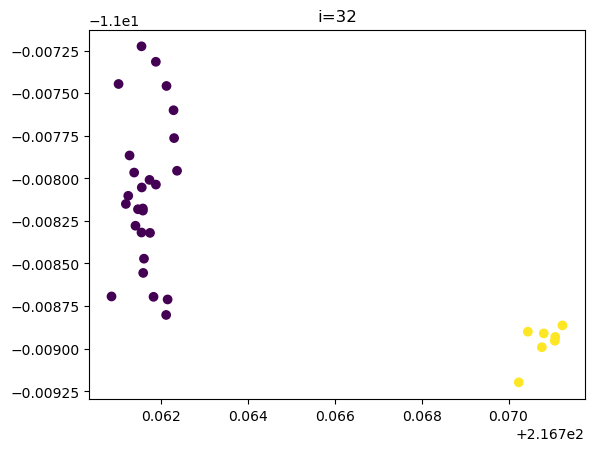

(33, 1) (33, 2)


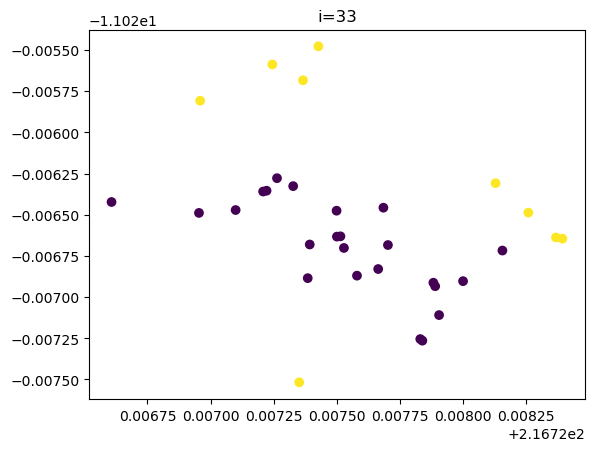

(33, 1) (33, 2)


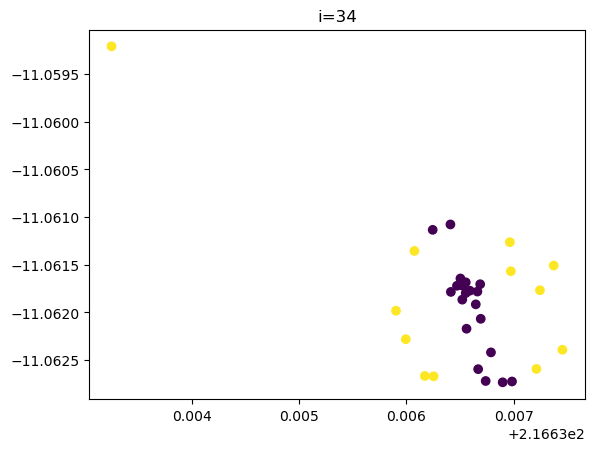

(33, 1) (33, 2)


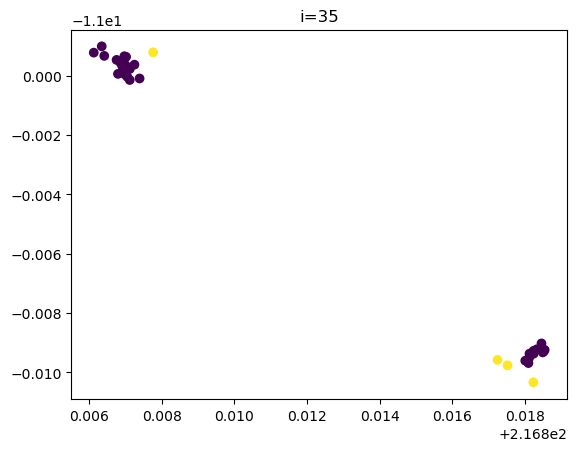

(32, 1) (32, 2)


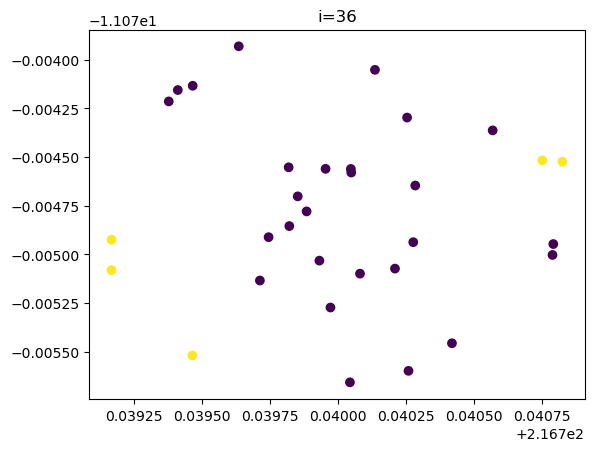

(31, 1) (31, 2)


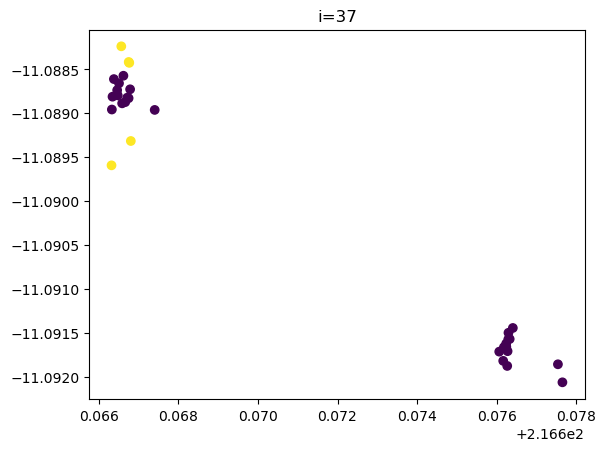

(31, 1) (31, 2)


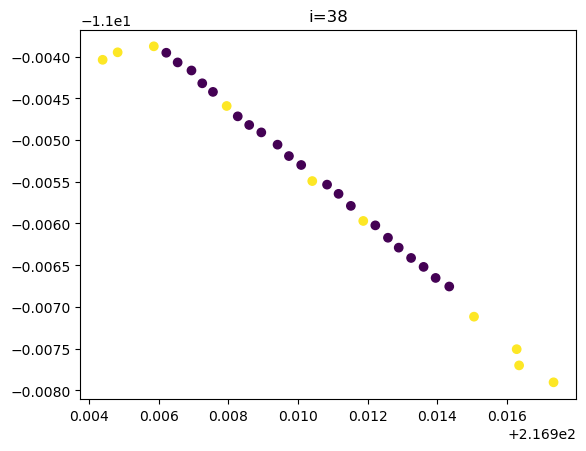

(31, 1) (31, 2)


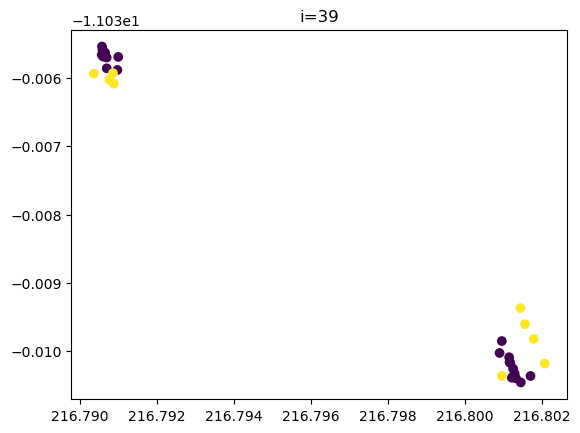

(31, 1) (31, 2)


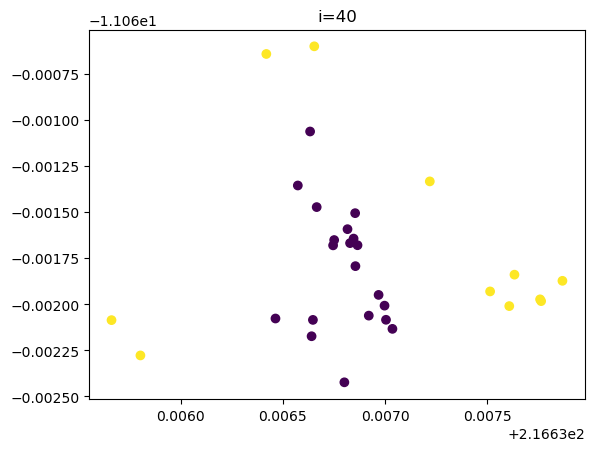

(30, 1) (30, 2)


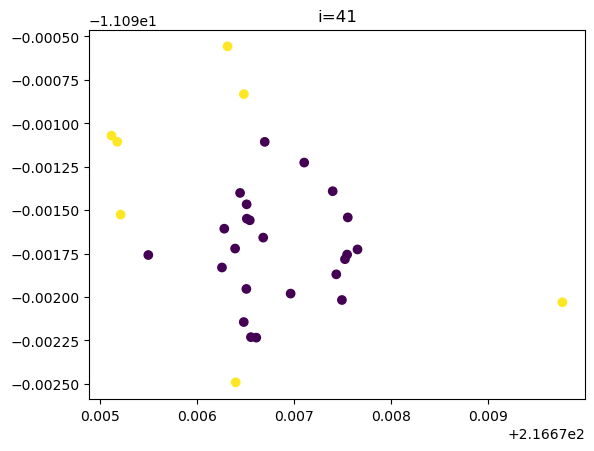

(30, 1) (30, 2)


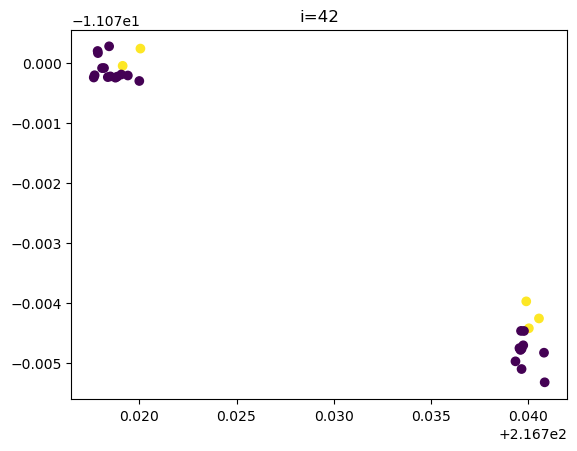

(30, 1) (30, 2)


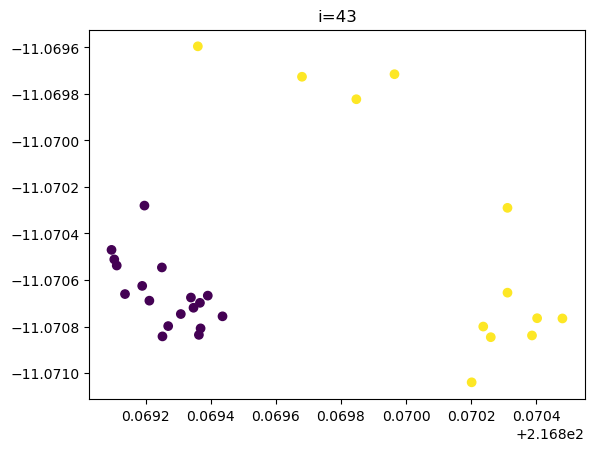

(30, 1) (30, 2)


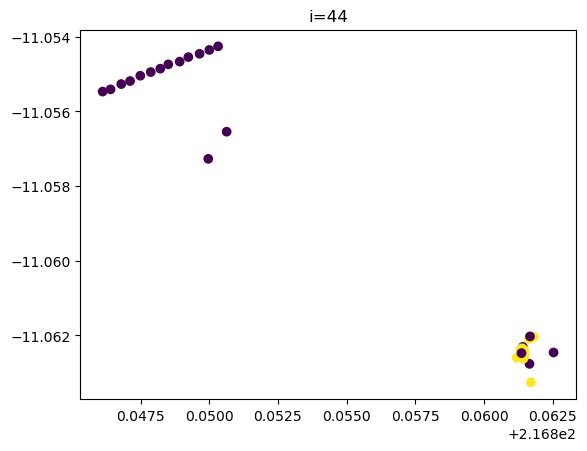

(30, 1) (30, 2)


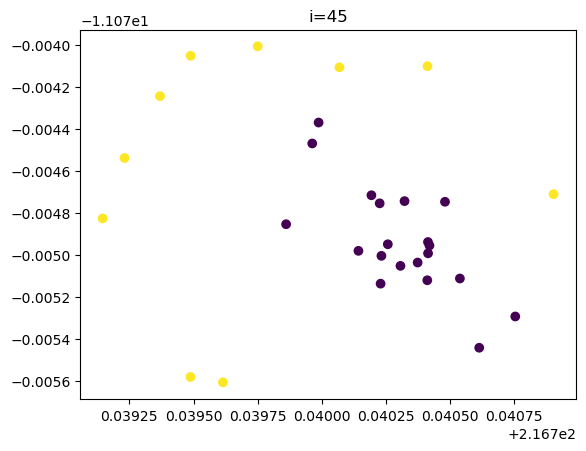

(30, 1) (30, 2)


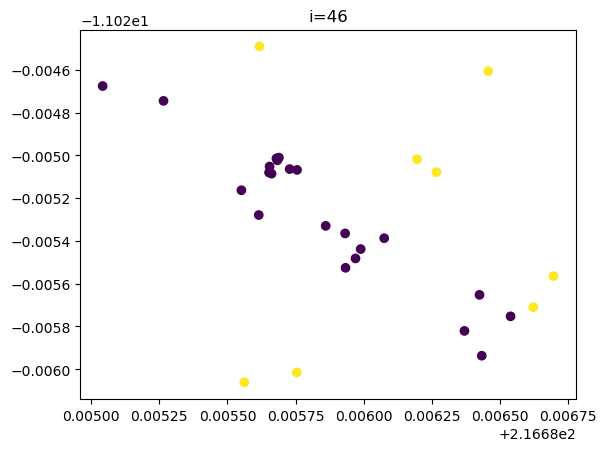

(30, 1) (30, 2)


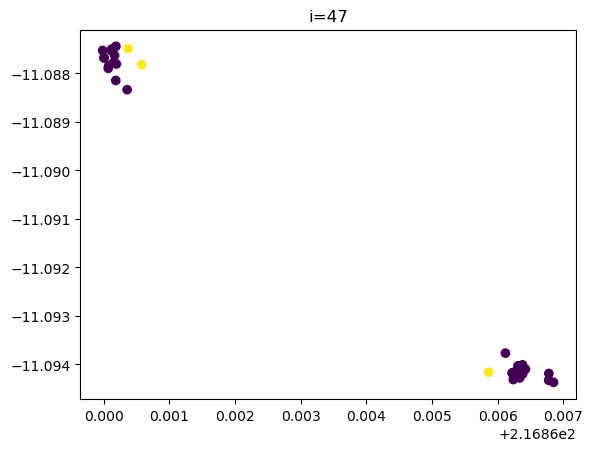

(30, 1) (30, 2)


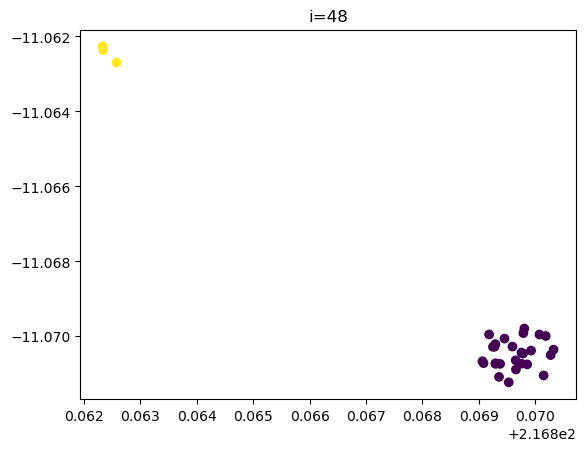

(29, 1) (29, 2)


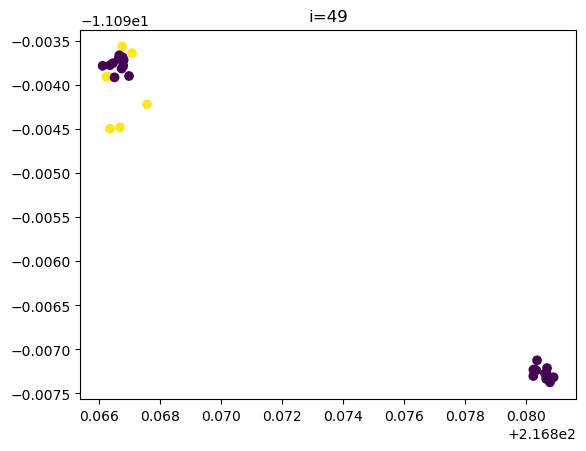

(29, 1) (29, 2)


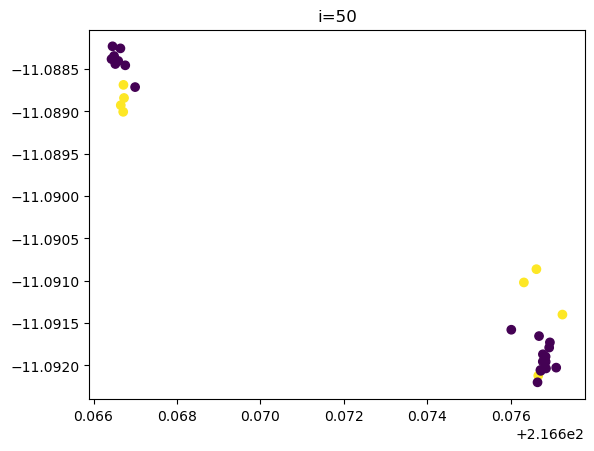

(29, 1) (29, 2)


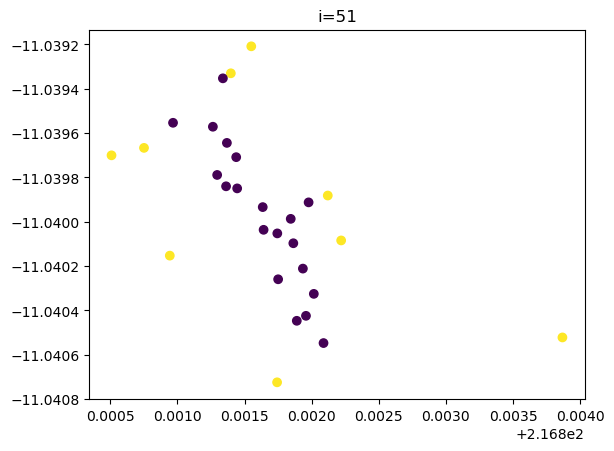

(29, 1) (29, 2)


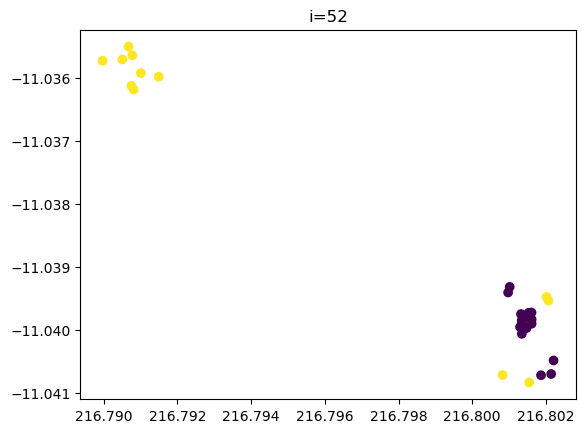

(29, 1) (29, 2)


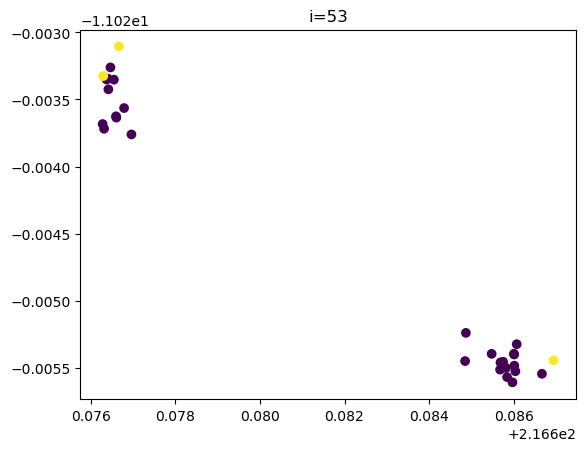

(29, 1) (29, 2)


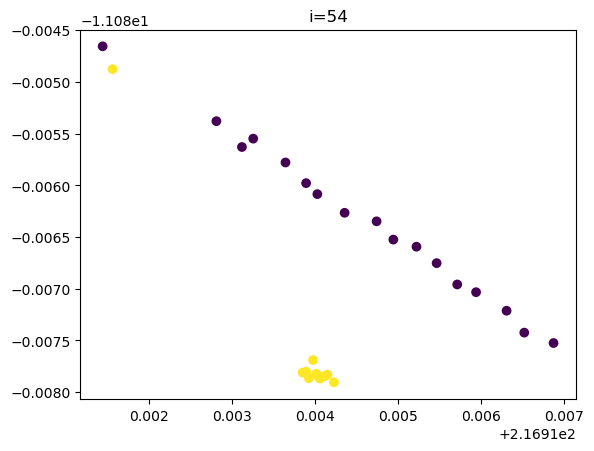

(29, 1) (29, 2)


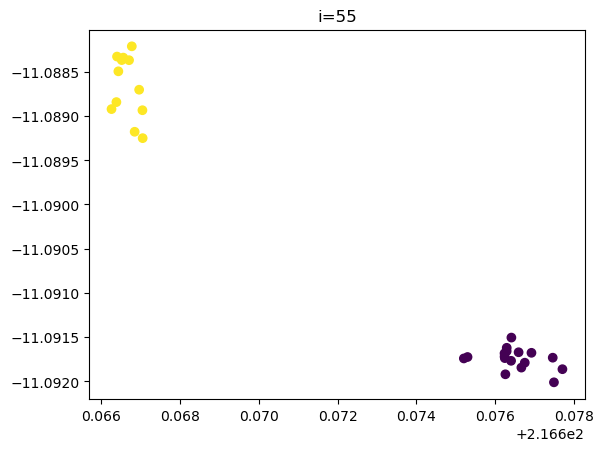

(29, 1) (29, 2)


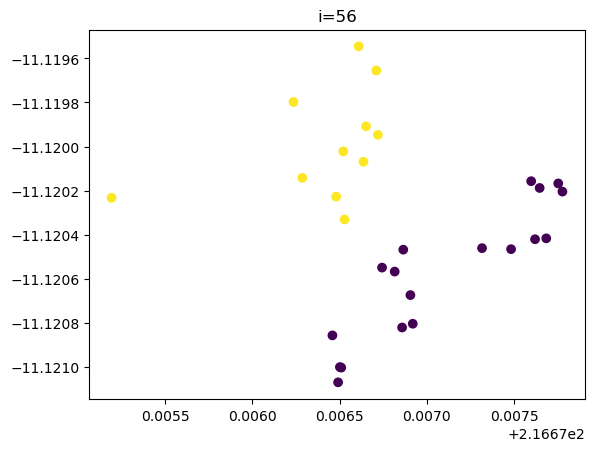

(29, 1) (29, 2)


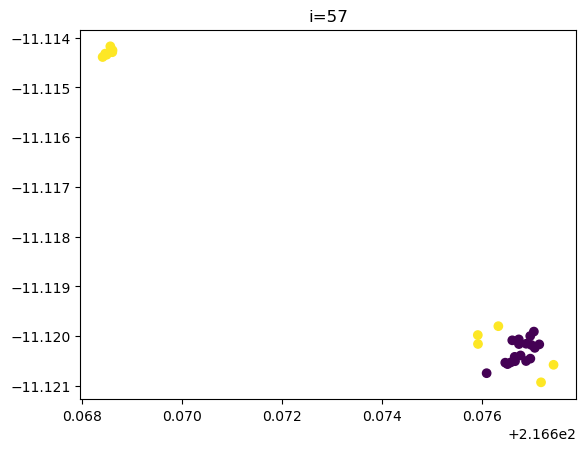

(29, 1) (29, 2)


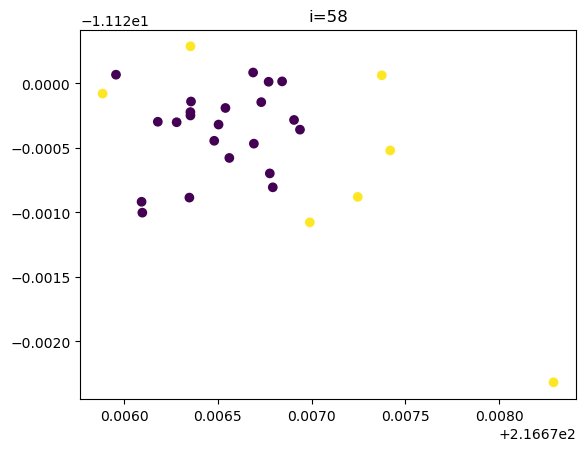

(30, 1) (30, 2)


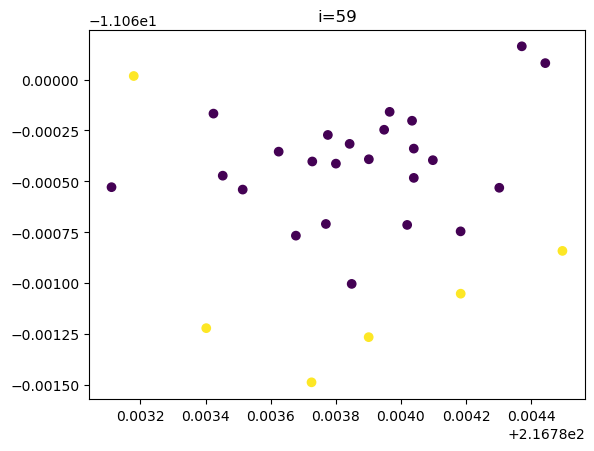

(29, 1) (29, 2)


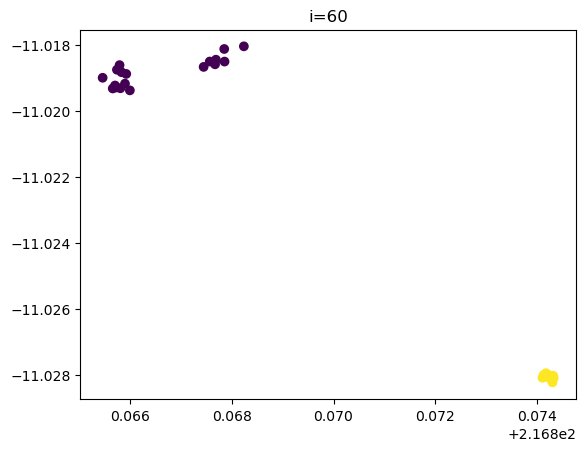

(28, 1) (28, 2)


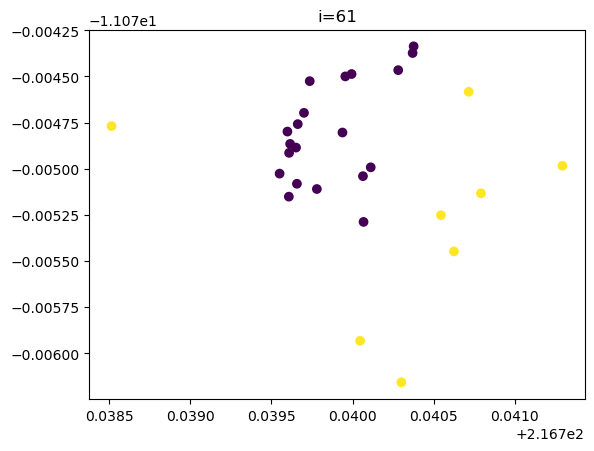

(28, 1) (28, 2)


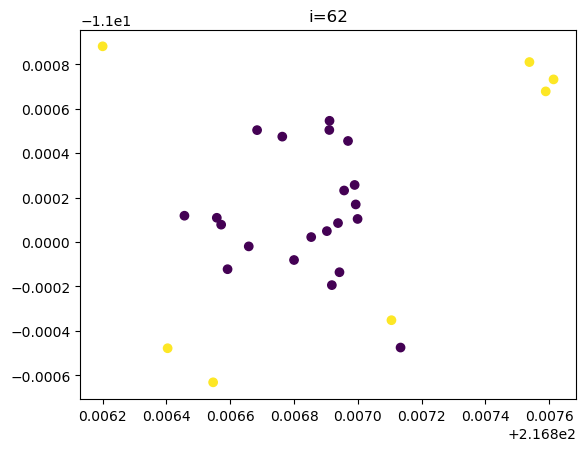

(28, 1) (28, 2)


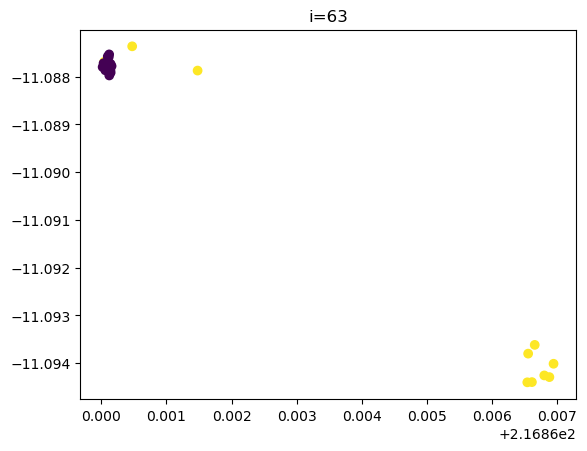

(28, 1) (28, 2)


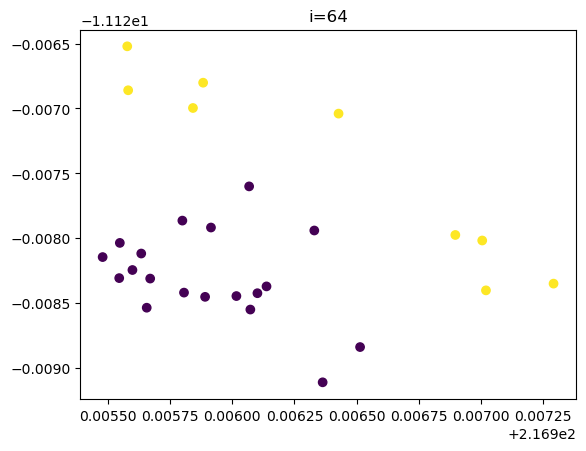

(28, 1) (28, 2)


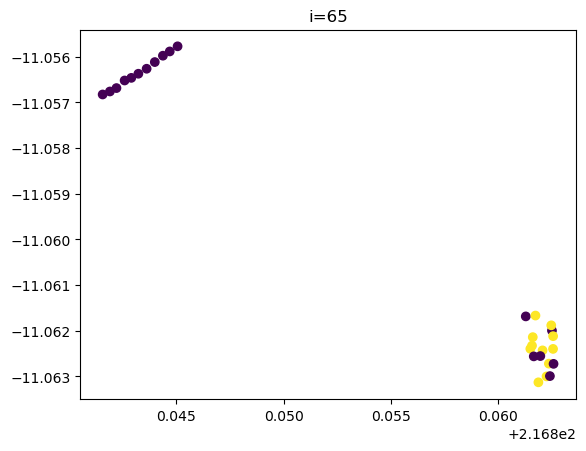

(28, 1) (28, 2)


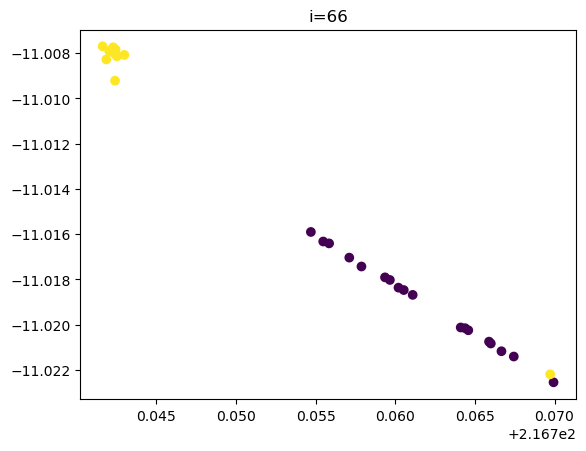

(27, 1) (27, 2)


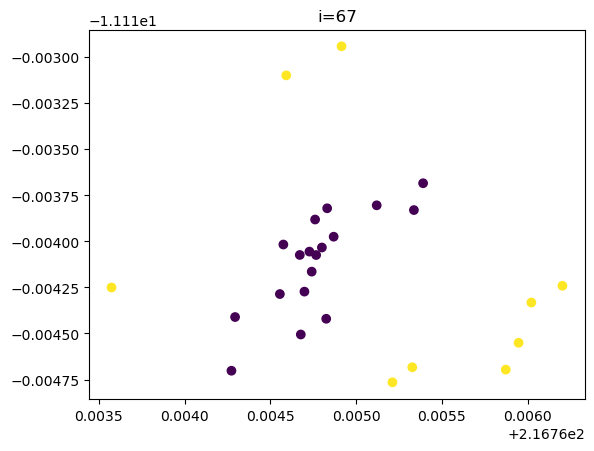

(27, 1) (27, 2)


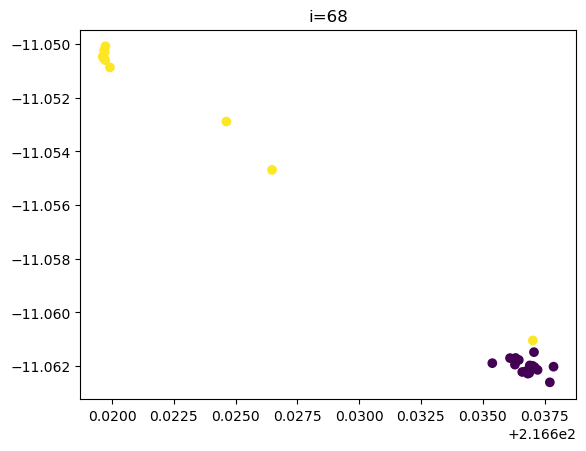

(27, 1) (27, 2)


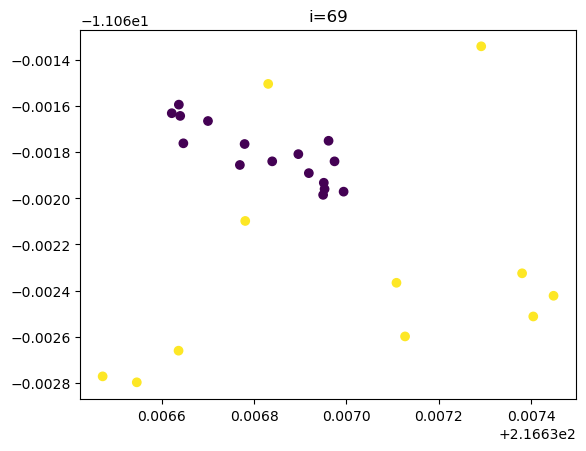

(27, 1) (27, 2)


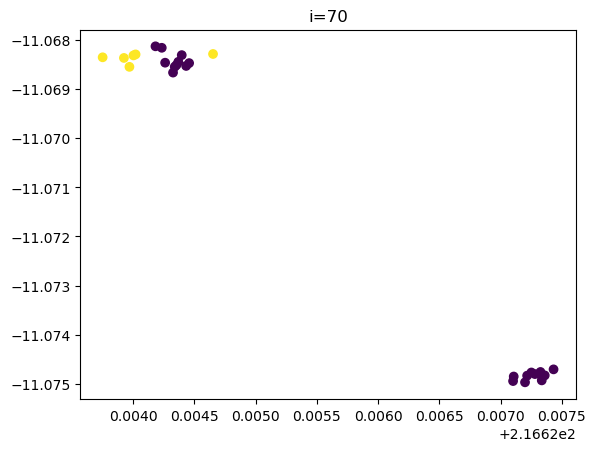

(27, 1) (27, 2)


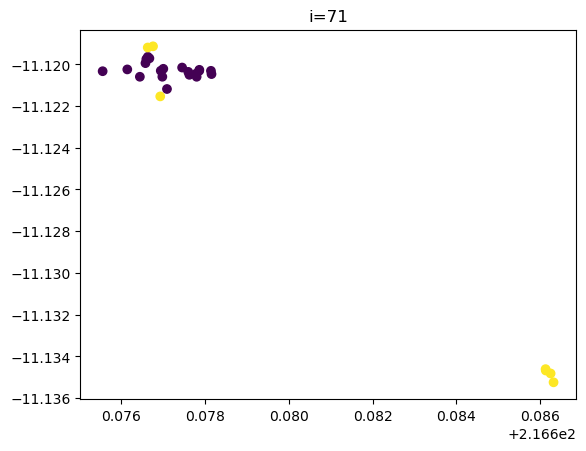

(26, 1) (26, 2)


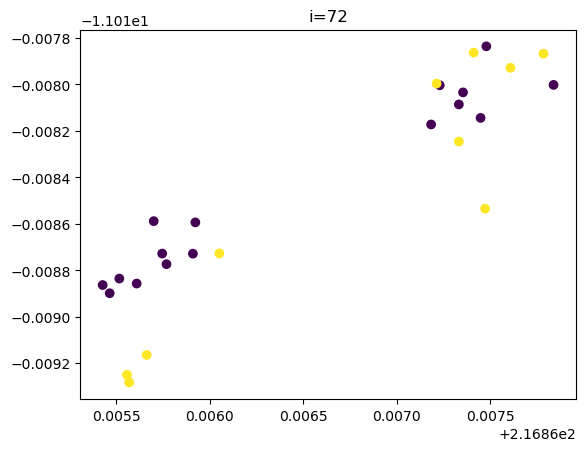

(26, 1) (26, 2)


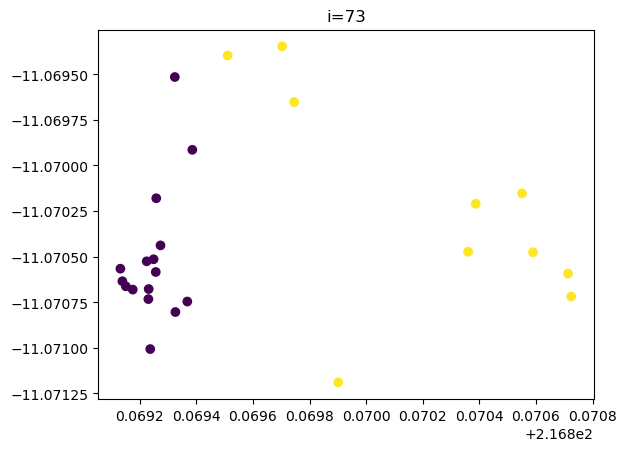

(26, 1) (26, 2)


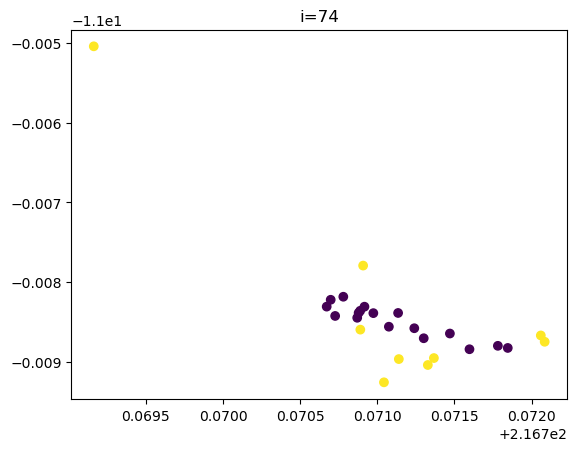

(25, 1) (25, 2)


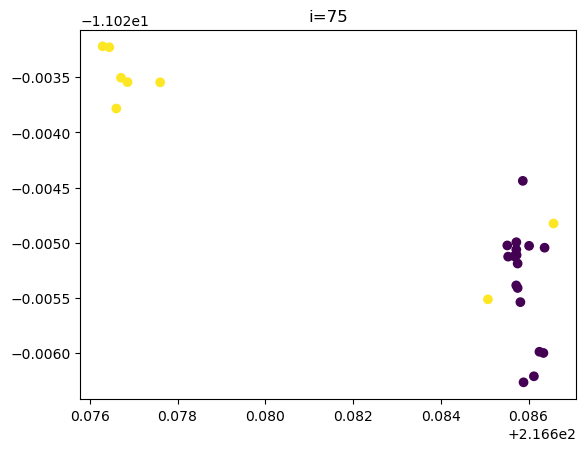

(25, 1) (25, 2)


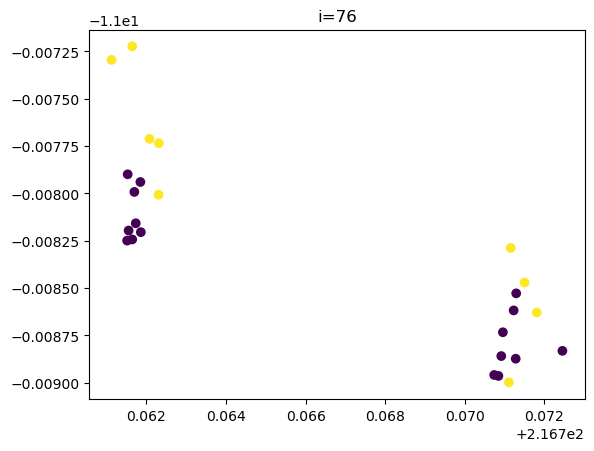

(25, 1) (25, 2)


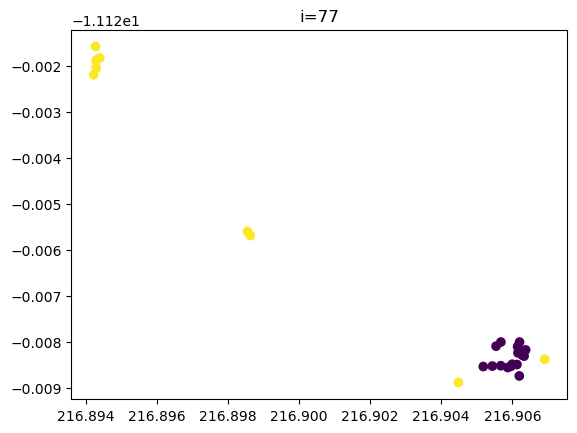

(25, 1) (25, 2)


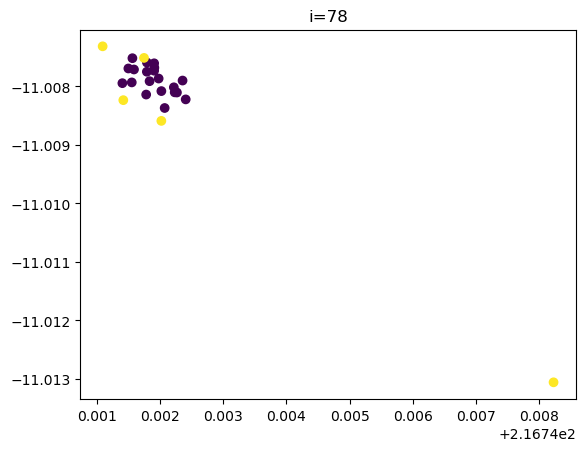

(25, 1) (25, 2)


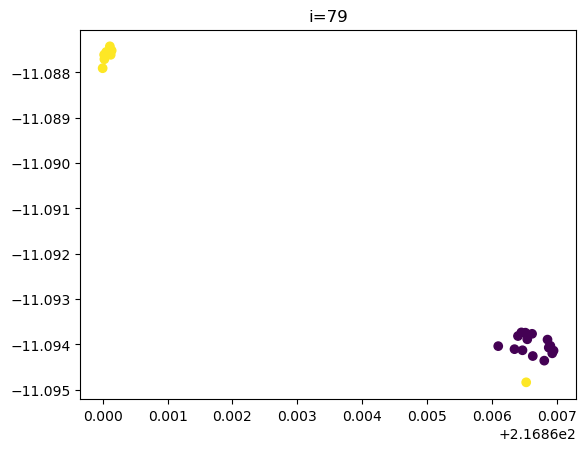

(25, 1) (25, 2)


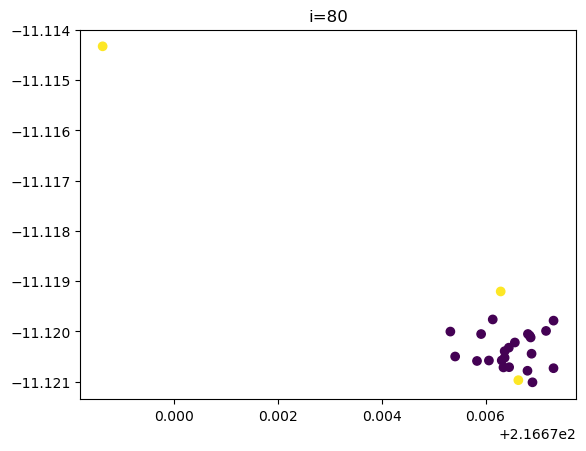

(25, 1) (25, 2)


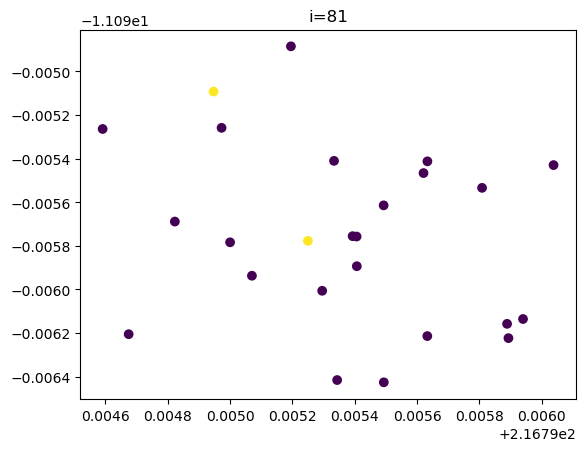

(25, 1) (25, 2)


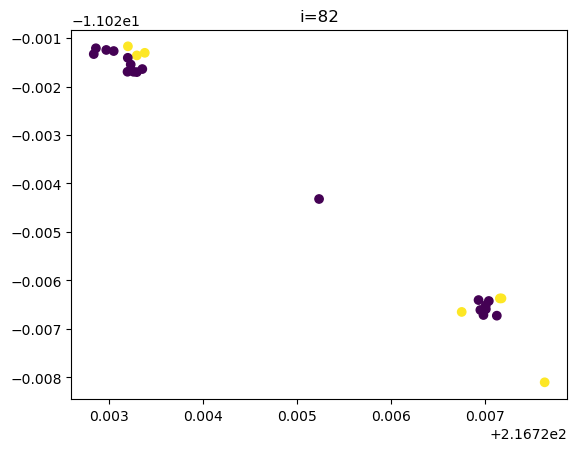

(25, 1) (25, 2)


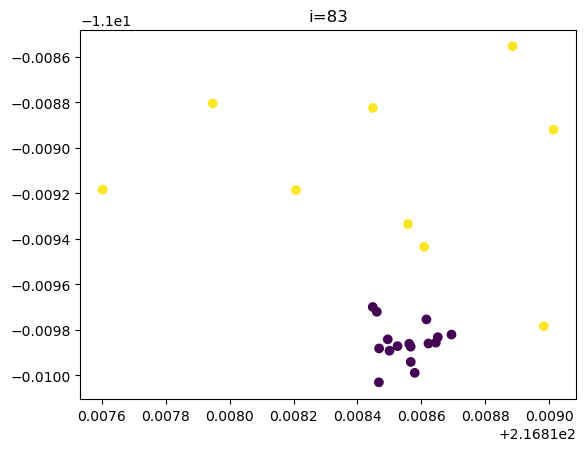

In [15]:
for i, cluster in enumerate(clusters.clusters):
    p = cluster.points
    x, y = p[:, 2][:, None], p[:, :2]
    print(x.shape, y.shape)
    regression_result = regression(x, y)
    plt.scatter(y[:, 0], y[:, 1], c=regression_result.outliers_r + regression_result.outliers_x)
    plt.title(f"i={i}")
    plt.show()

In [4]:
clusters.clusters[10].write("interesting_cluster.pkl")

In [29]:
catalog.time.min()

58577.21560552204

In [5]:
def plot_cluster(cluster):
    p = cluster.points
    x, y = p[:, 2][:, None], p[:, :2]
    regression_result = regression(x, y)
    plt.scatter(y[:, 0], y[:, 1], c=x[:, 0])
    
def plot_result(result, x):
    _x = np.linspace(x.min(), x.max(), 100)[:, None]
    _y = _x @ result.beta + regression_result.alpha
    plt.plot(_y[:, 0], _y[:, 1])

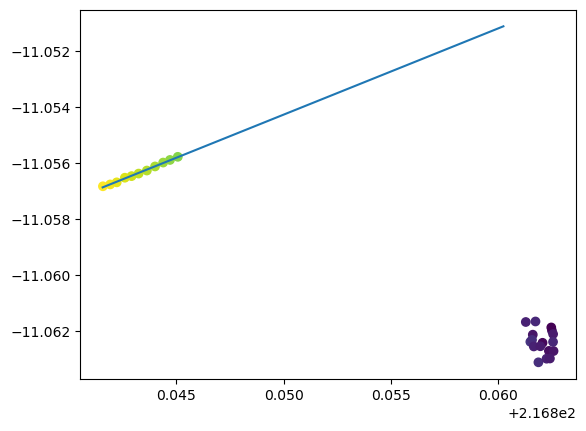

In [109]:
def refine(cluster):
    p = cluster.points
    mask = np.ones(len(p)).astype(bool)
    x, y = p[mask, 2][:, None], p[mask, :2]
    regression_result = regression(x, y)
    outliers = (regression_result.outliers_r | regression_result.outliers_x)
    inliers = ~outliers
    if outliers.sum() > len(x) / 4: # there is a chance for confusion between inliers/outliers
        inlier_regression = regression(x[inliers], y[inliers])
        outlier_regression = regression(x[outliers], y[outliers])
        
        regression_error = (np.diag(regression_result.sigma_e)**2).sum()
        inlier_error = (np.diag(inlier_regression.sigma_e)**2).sum()
        outlier_error = (np.diag(outlier_regression.sigma_e)**2).sum()
    
        if regression_error > inlier_error and regression_error > outlier_error:
            if inlier_error > outlier_error:
                result = outlier_regression
            else:
                result = inlier_regression
        elif regression_error > inlier_error:
            result = inlier_regression
        elif regression_error > outlier_error:
            result = outlier_regression
        else:
            result = regression_result
    else:
        reult = regression_result

    return result
    
cluster = clusters.clusters[65]
result = refine(cluster)
plot_cluster(cluster)
plot_result(result, cluster.points[:, 2])

(17, 1) (17, 2)


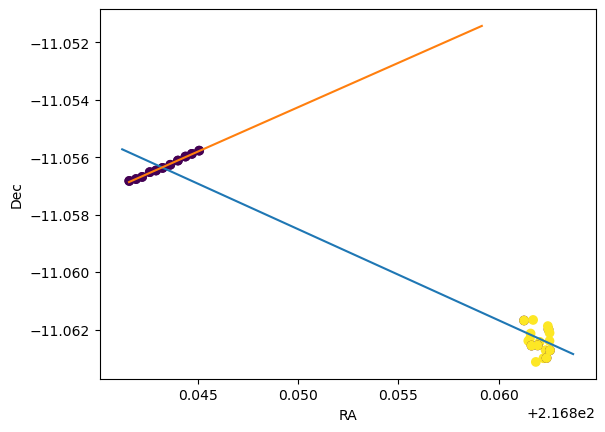

In [102]:
cluster = clusters.clusters[65]
p = cluster.points
mask = np.ones(len(p)).astype(bool)

fig = plt.figure(facecolor='white')
print(x.shape, y.shape)
# perform two more regressions, one with the inliers and one with the outliers
# pick the result that minimizes 
for i in range(2):
    p = cluster.points
    x, y = p[mask, 2][:, None], p[mask, :2]
    regression_result = regression(x, y)
    plt.scatter(y[:, 0], y[:, 1], c=regression_result.outliers_r + regression_result.outliers_x)
    _x = np.linspace(x.min(), x.max(), 100)[:, None]
    _y = _x @ regression_result.beta + regression_result.alpha
    # print(_y)
    plt.plot(_y[:, 0], _y[:, 1])
    mask = ~(regression_result.outliers_r | regression_result.outliers_x)
    
plt.xlabel("RA")
plt.ylabel("Dec")
# plt.title(f"i={i}")
plt.savefig("confusion_example.png")
plt.show()

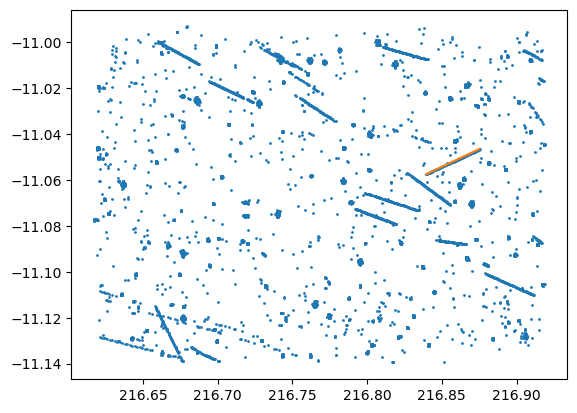

[0.2442692  0.24229827 0.24242976 ... 0.07481307 0.07555911 0.08670033]


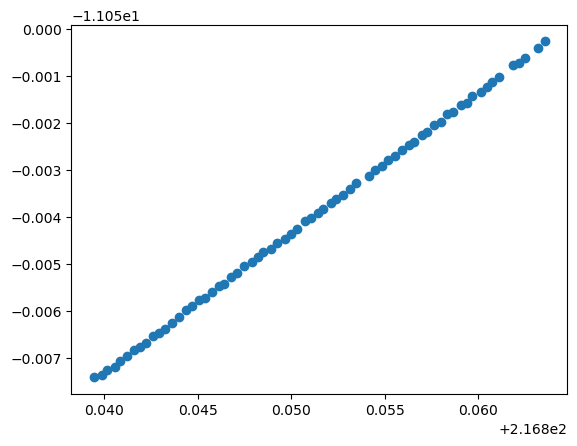

In [103]:
X = catalog.X(columns=['ra', 'dec', 'time'])

_x = np.linspace(X[:, 2].min(), X[:, 2].max(), 100)[:, None]
_y = _x @ regression_result.beta + regression_result.alpha
# print(_y)
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.plot(_y[:, 0], _y[:, 1], color="C1")
plt.show()

residuals = (
    X[:, :2] - 
    (X[:, 2:] @ regression_result.beta + regression_result.alpha)
)
distance = (residuals**2).sum(axis=1)**0.5
print(distance)
p = X[distance < 1/3600]
plt.scatter(p[:, 0], p[:, 1])
plt.show()

[0.2442692  0.24229827 0.24242976 ... 0.07481307 0.07555911 0.08670033]


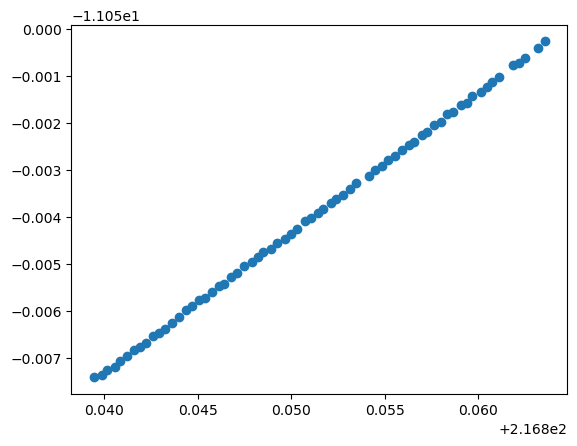

In [99]:

# # distance < 1/3600
# plt.hist(residuals)
# p = catalog.X()[distance < 2/3600]

# mask = np.ones(len(p)).astype(bool)
# x, y = p[mask, 2][:, None], p[mask, :2]
# regression_result = regression(x, y)
# plt.scatter(y[:, 0], y[:, 1], c=regression_result.outliers_r + regression_result.outliers_x)
# _x = np.linspace(x.min(), x.max(), 100)[:, None]
# _y = _x @ regression_result.beta + regression_result.alpha
# plt.plot(_y[:, 0], _y[:, 1])
# plt.show()

(17, 1) (17, 2)


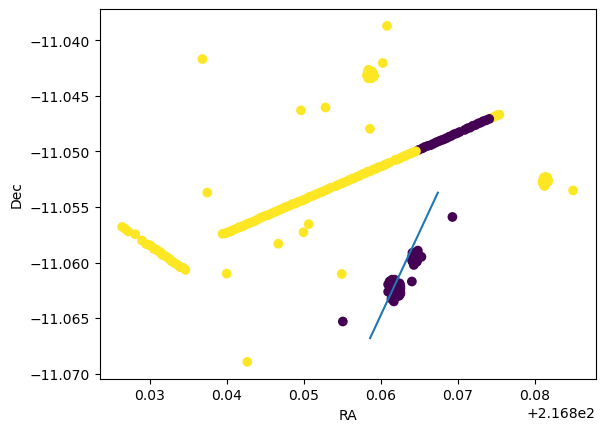

In [65]:
# cluster = clusters.clusters[65]
# p = cluster.points
mask = np.ones(len(p)).astype(bool)

fig = plt.figure(facecolor='white')
print(x.shape, y.shape)
for i in range(1):
    x, y = p[mask, 2][:, None], p[mask, :2]
    regression_result = regression(x, y)
    plt.scatter(y[:, 0], y[:, 1], c=regression_result.outliers_r + regression_result.outliers_x)
    _x = np.linspace(x.min(), x.max(), 100)[:, None]
    _y = _x @ regression_result.beta + regression_result.alpha
    # print(_y)
    plt.plot(_y[:, 0], _y[:, 1])
#     mask = ~(regression_result.outliers_r | regression_result.outliers_x)
    
plt.xlabel("RA")
plt.ylabel("Dec")
# plt.title(f"i={i}")
# plt.savefig("confusion_example.png")
plt.show()

In [31]:
(_x - catalog.time.min()) @ regression_result.beta + regression_result.alpha

array([[14277.64054296, -4468.70827541],
       [14277.64031575, -4468.70820338],
       [14277.64008853, -4468.70813135],
       [14277.63986132, -4468.70805931],
       [14277.6396341 , -4468.70798728],
       [14277.63940689, -4468.70791525],
       [14277.63917968, -4468.70784321],
       [14277.63895246, -4468.70777118],
       [14277.63872525, -4468.70769915],
       [14277.63849803, -4468.70762712],
       [14277.63827082, -4468.70755508],
       [14277.63804361, -4468.70748305],
       [14277.63781639, -4468.70741102],
       [14277.63758918, -4468.70733898],
       [14277.63736196, -4468.70726695],
       [14277.63713475, -4468.70719492],
       [14277.63690754, -4468.70712288],
       [14277.63668032, -4468.70705085],
       [14277.63645311, -4468.70697882],
       [14277.63622589, -4468.70690679],
       [14277.63599868, -4468.70683475],
       [14277.63577146, -4468.70676272],
       [14277.63554425, -4468.70669069],
       [14277.63531704, -4468.70661865],
       [14277.63

In [8]:
refined = Clusters.read("../search/DEEP/20190403/A0c/detector_3/snr_5/refined_clusters.pkl")

In [3]:
iter(refined)

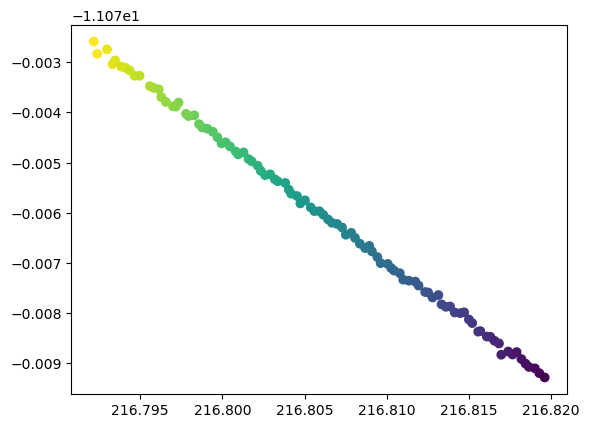

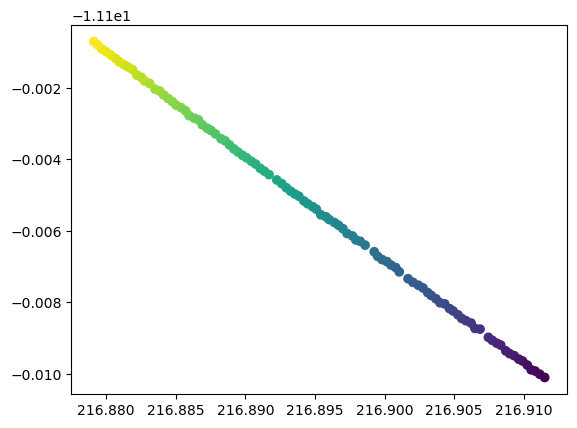

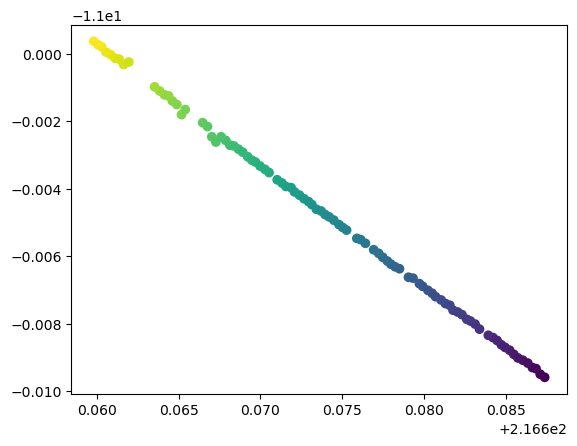

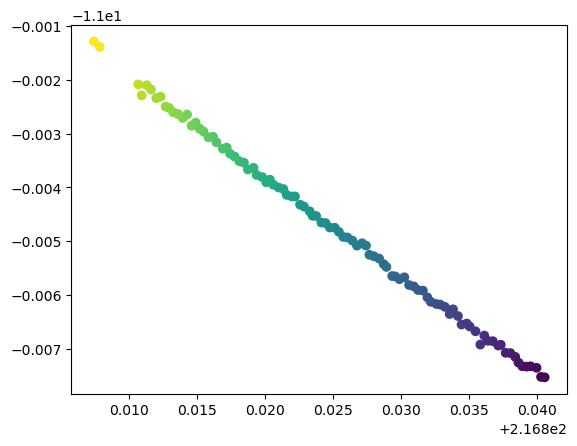

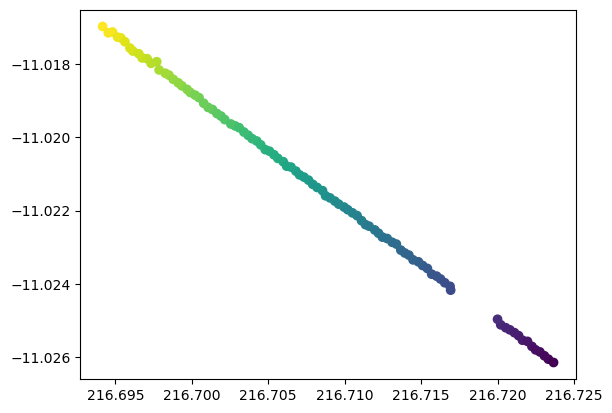

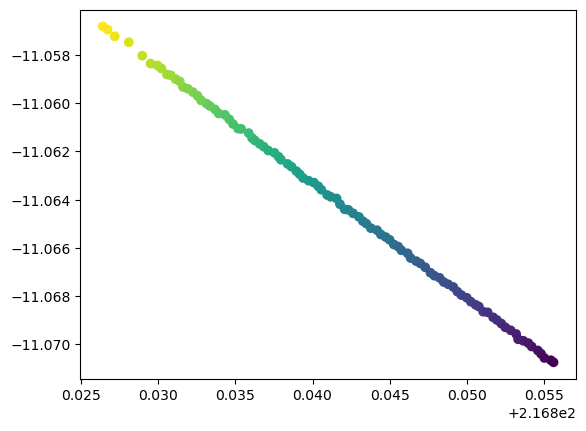

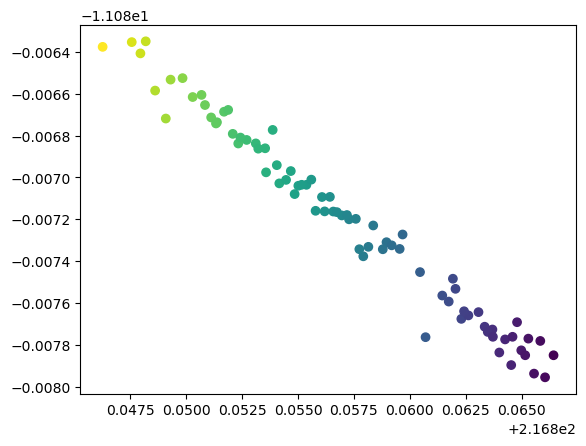

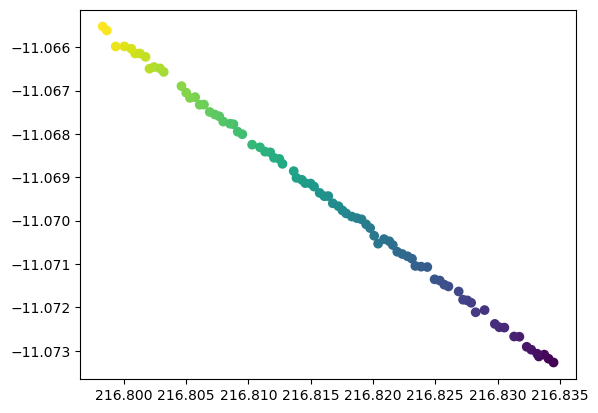

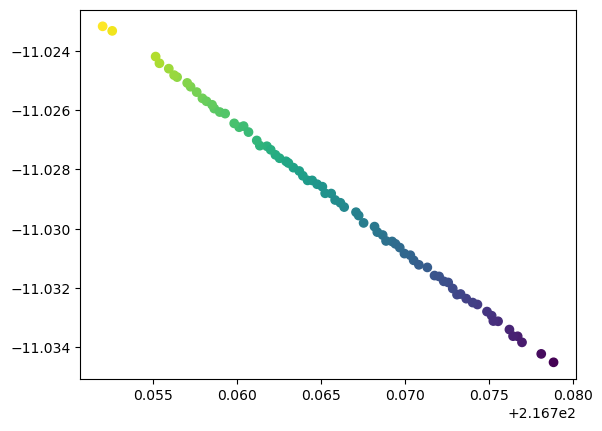

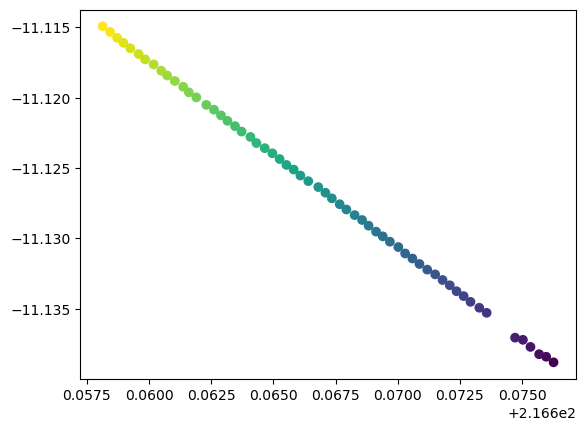

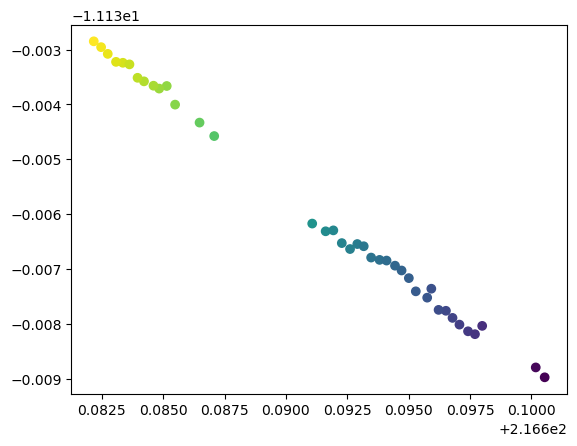

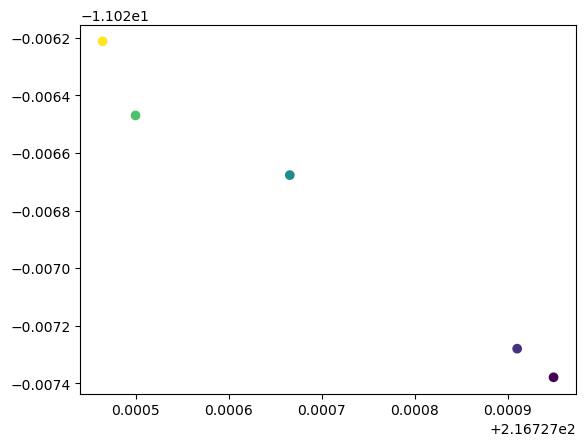

/nvme/users/stevengs/opt_lsst/conda/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


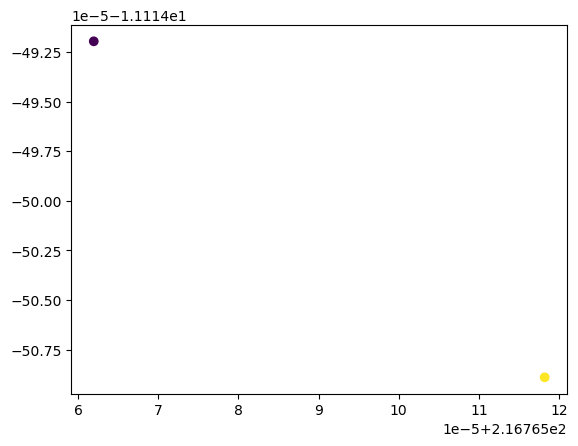

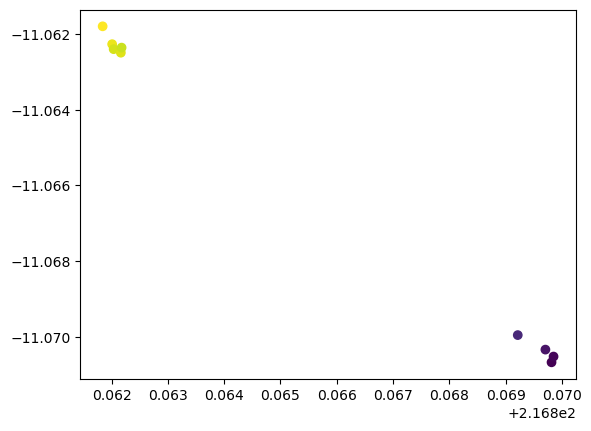

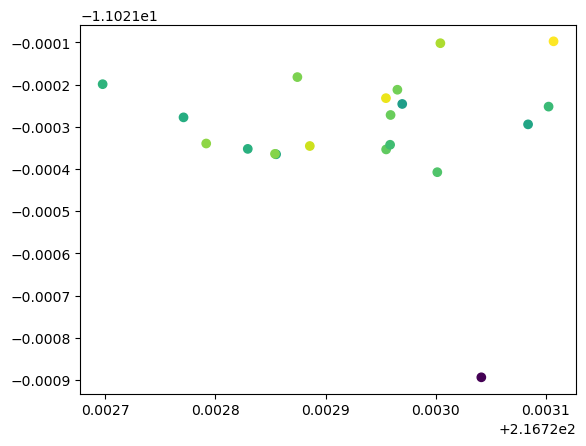

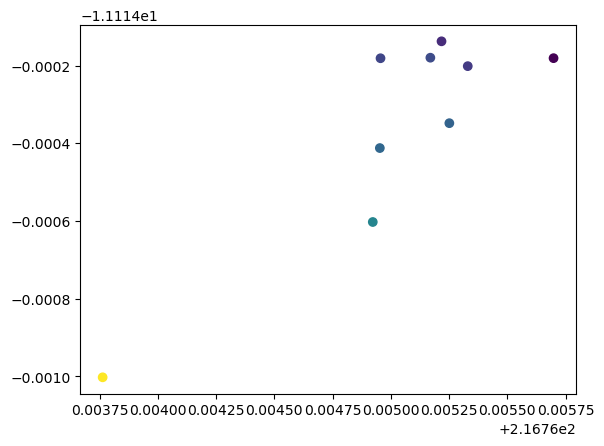

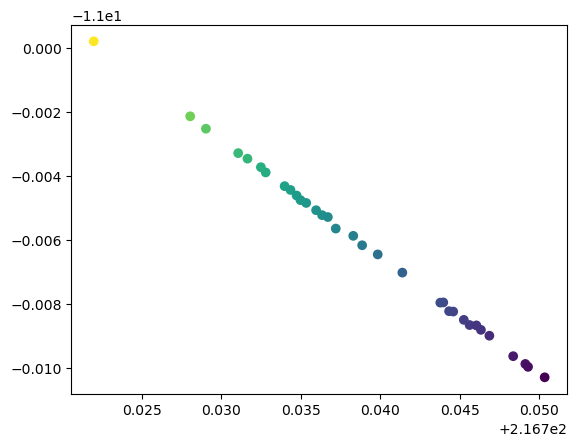

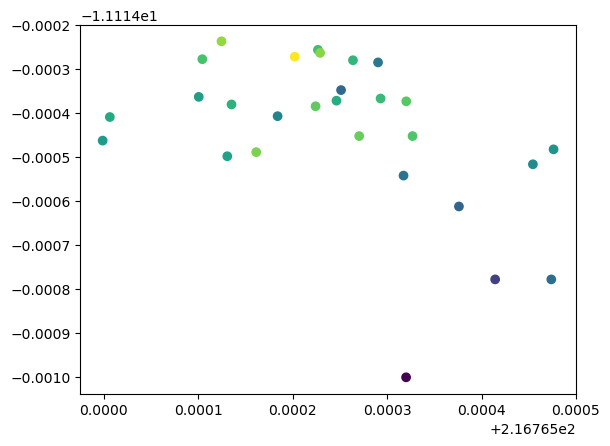

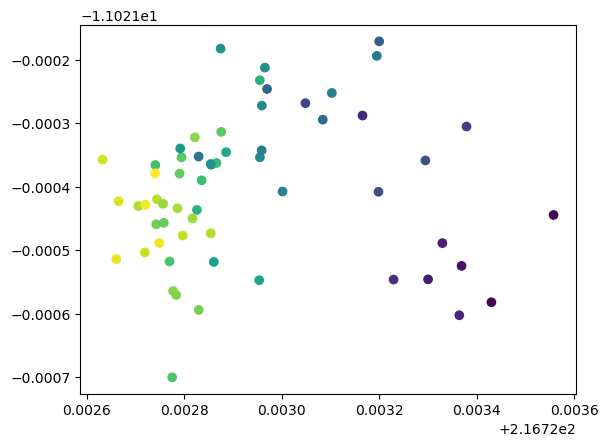

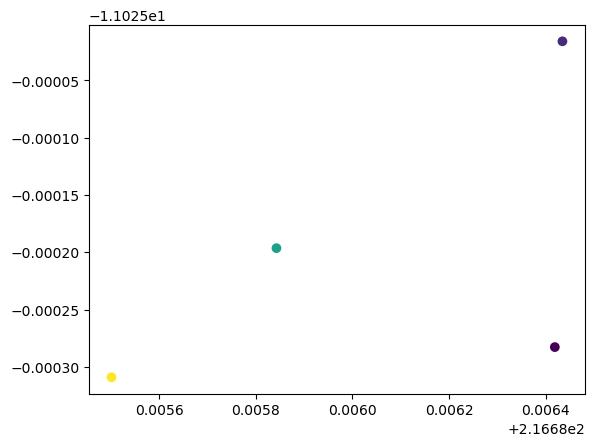

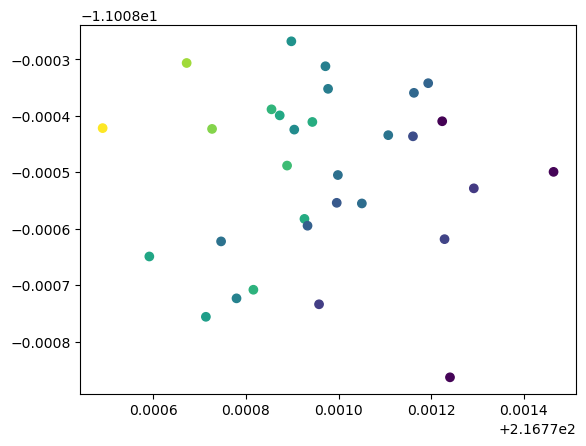

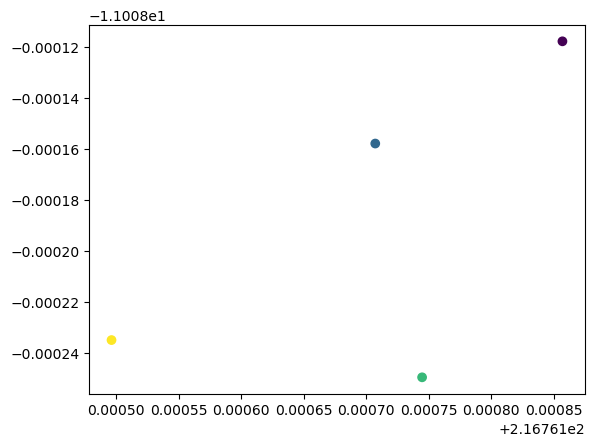

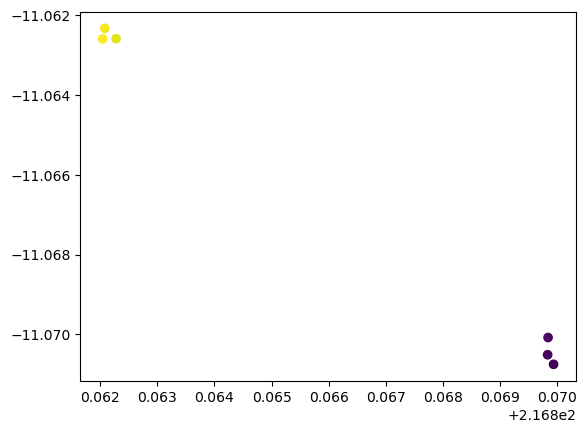

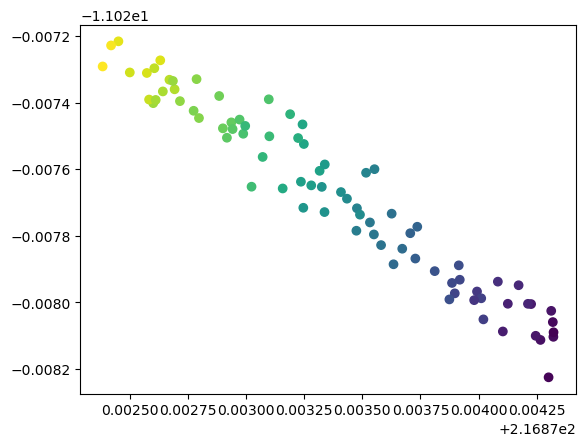

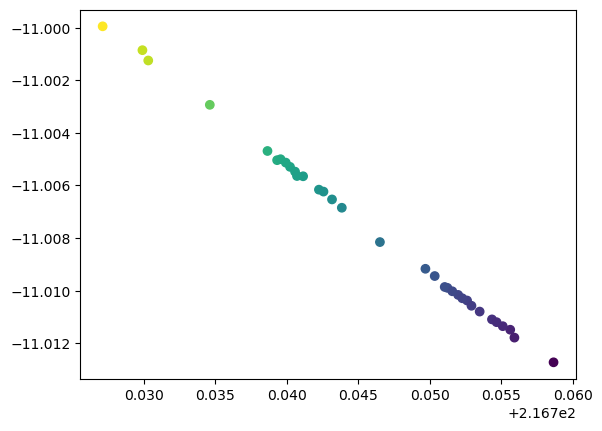

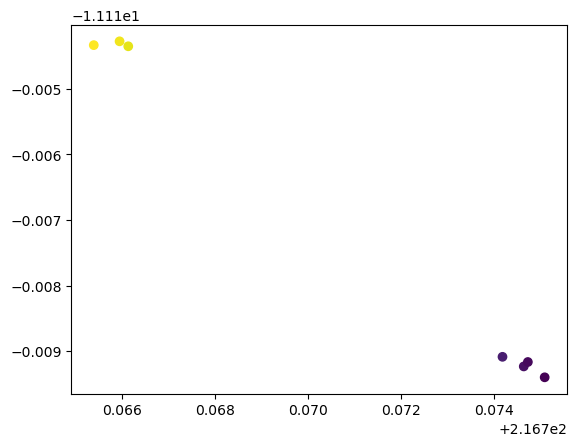

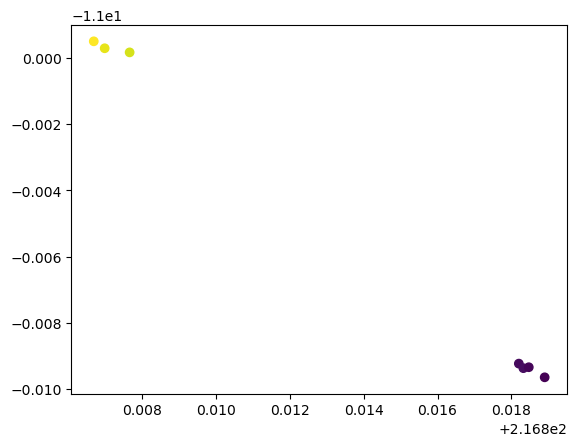

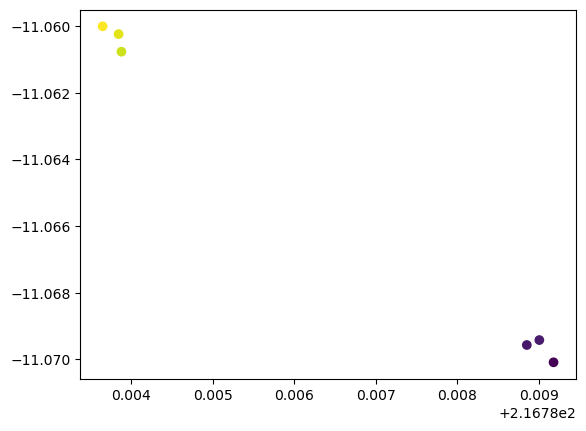

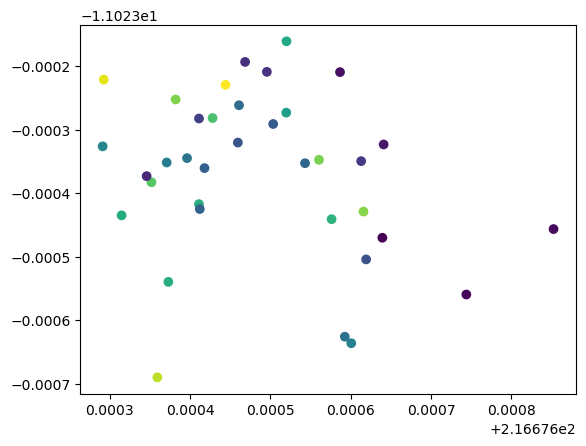

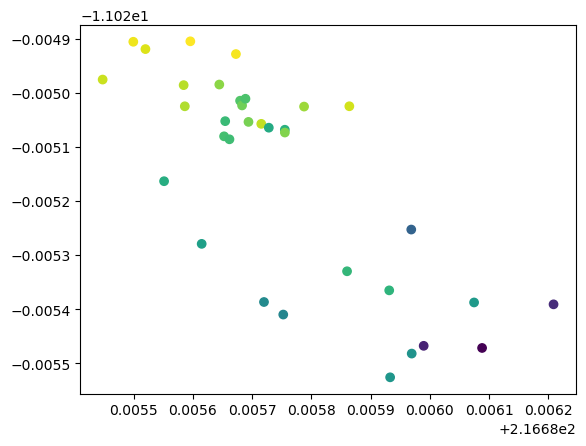

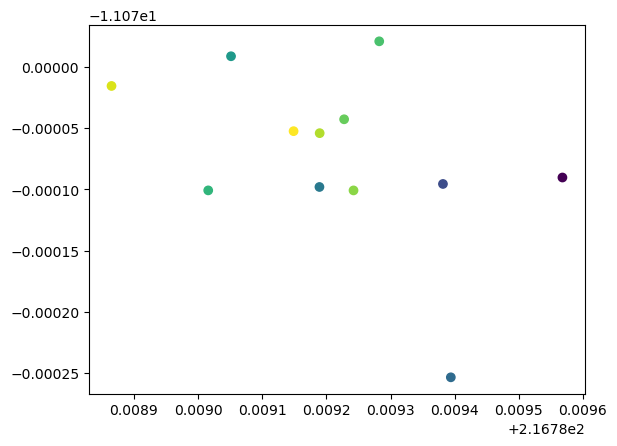

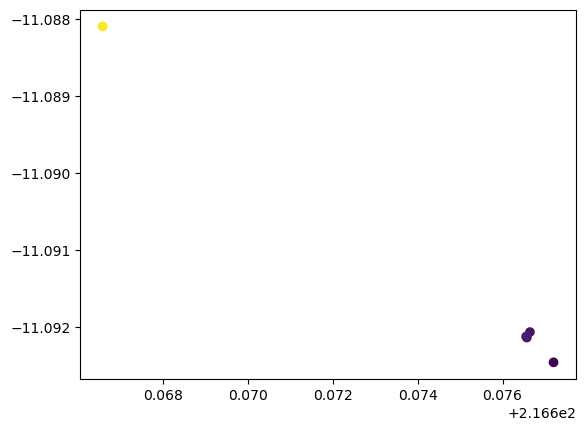

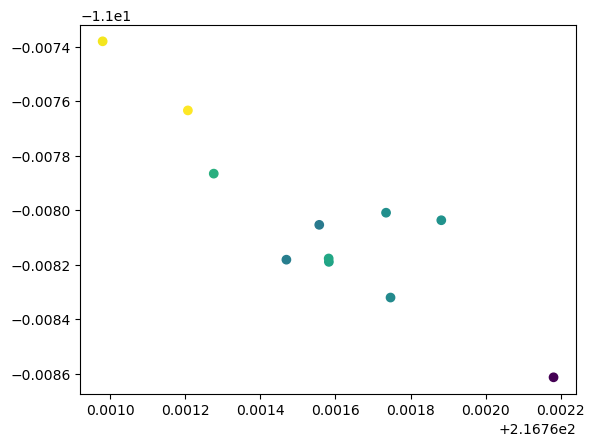

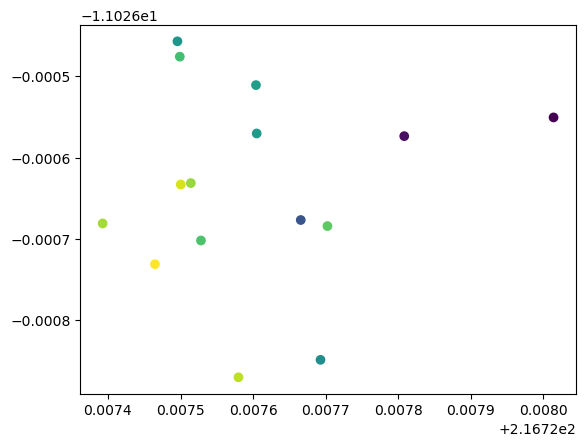

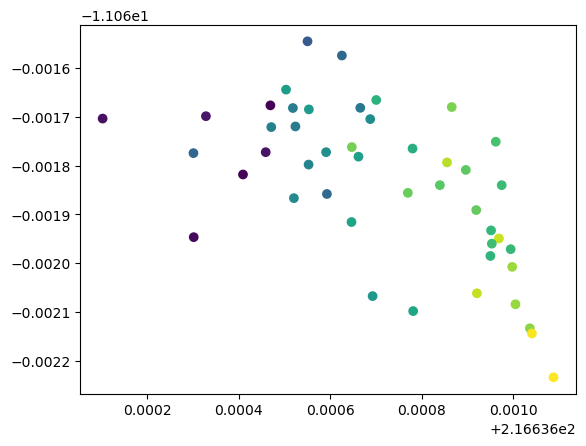

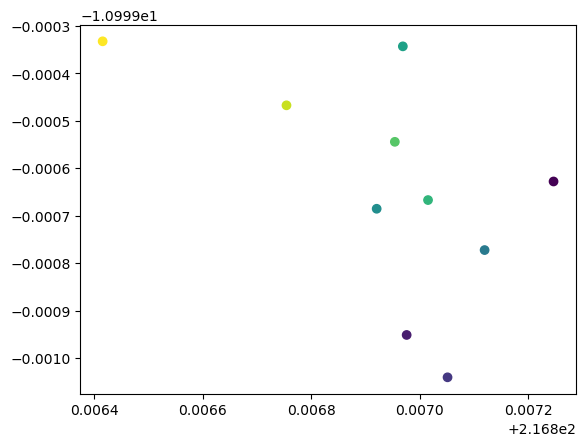

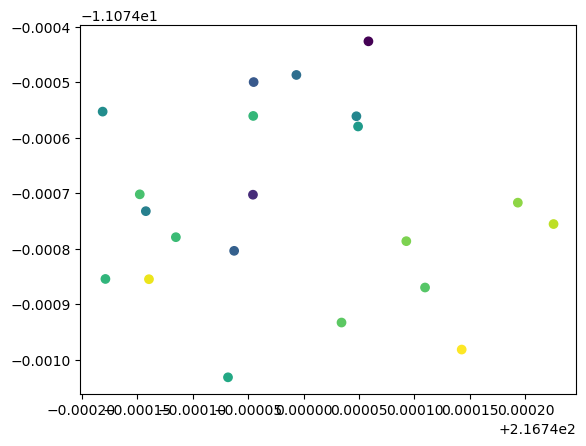

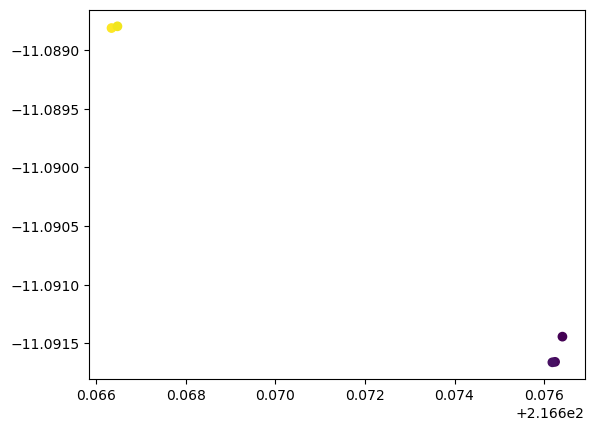

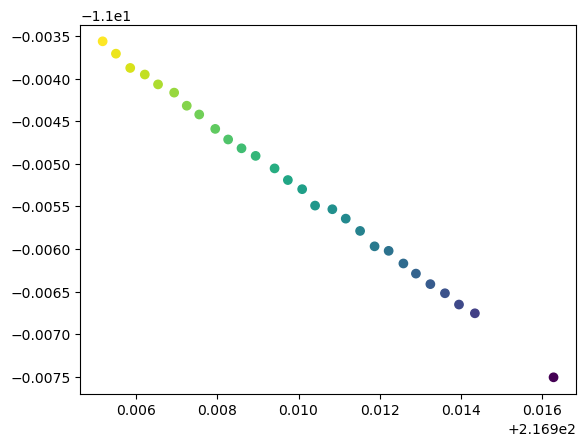

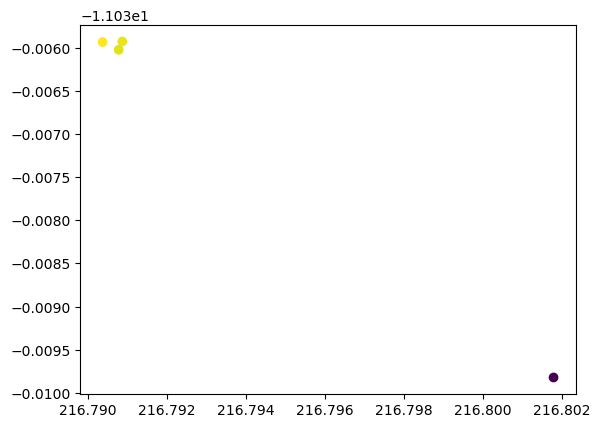

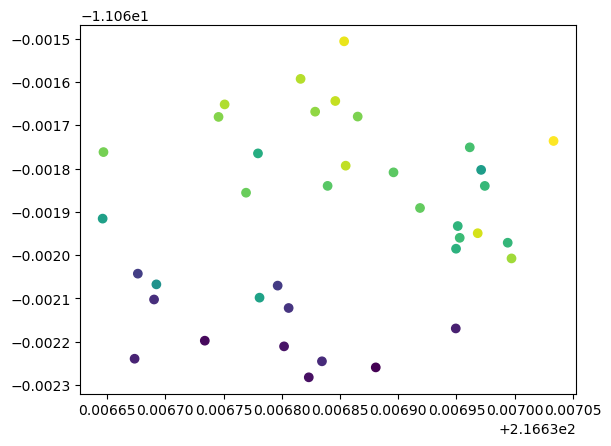

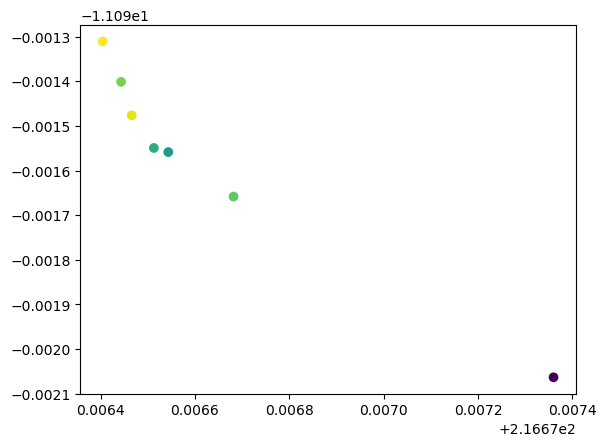

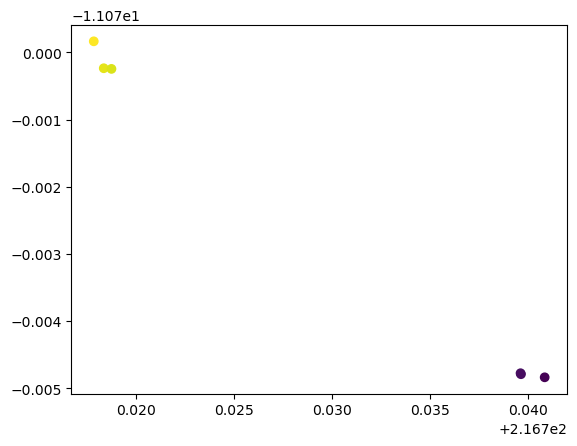

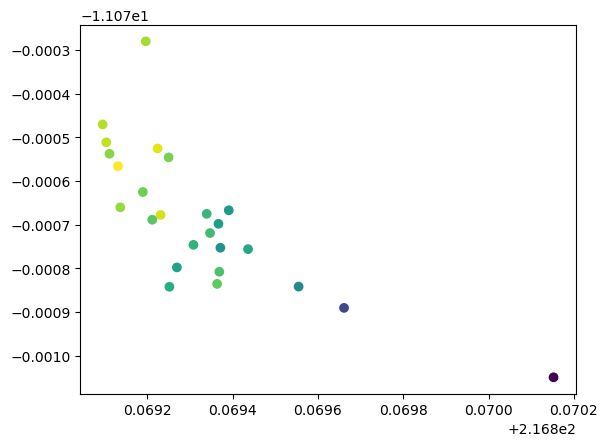

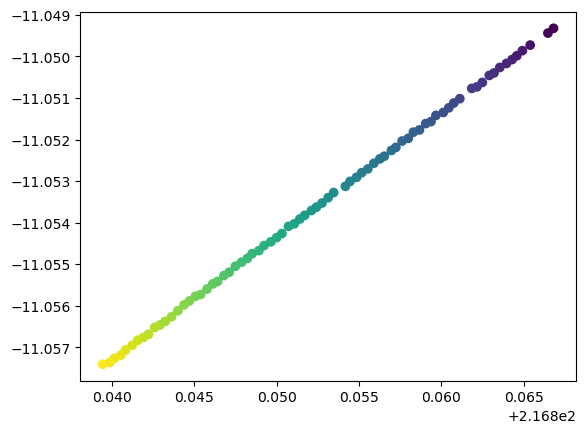

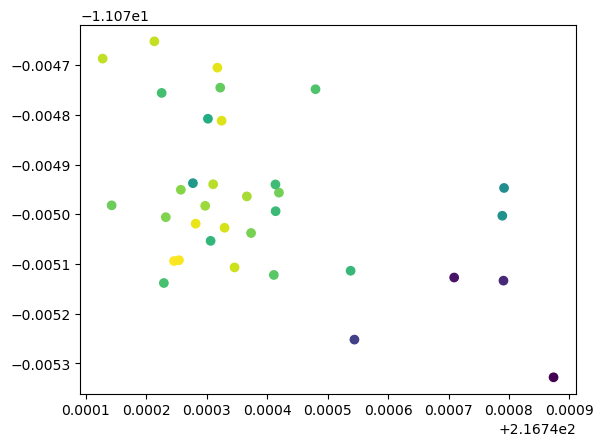

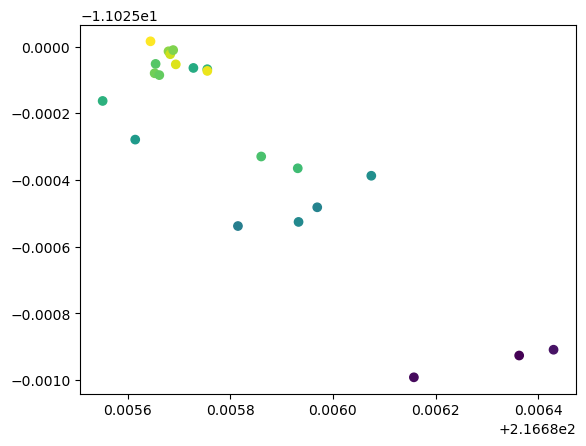

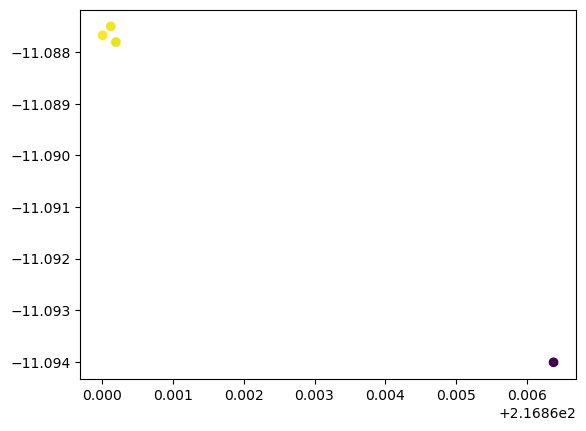

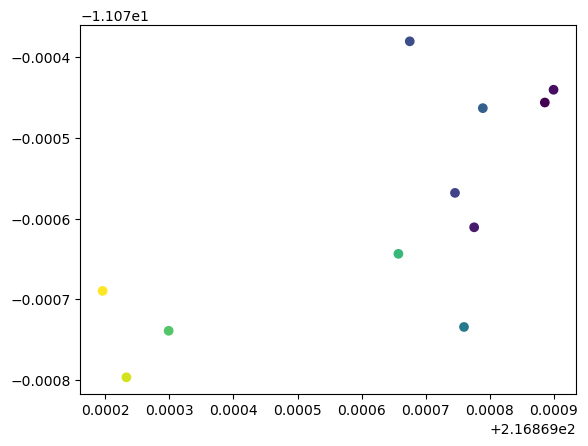

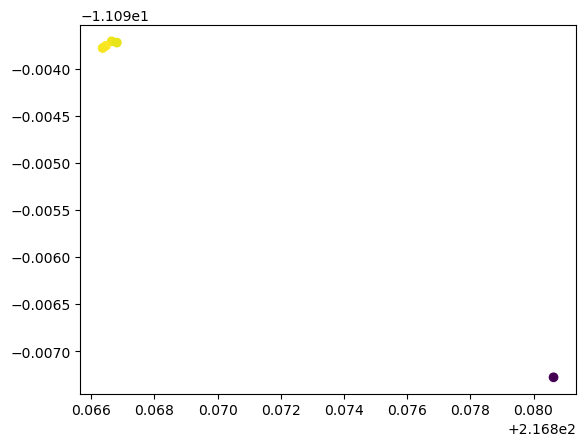

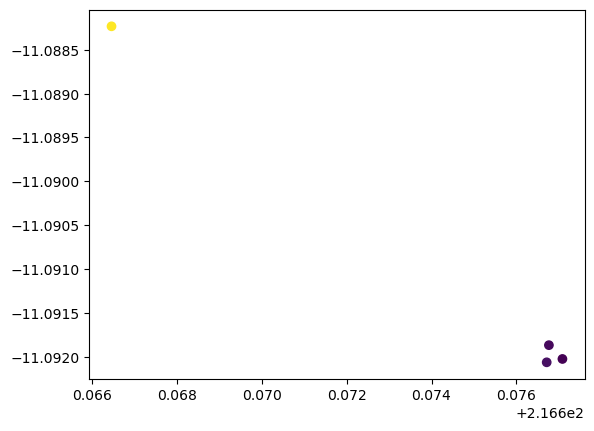

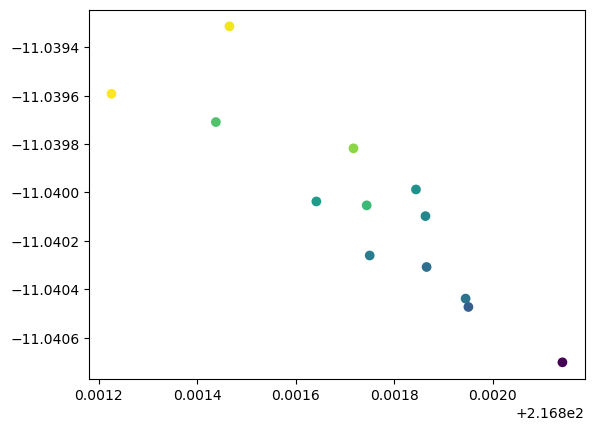

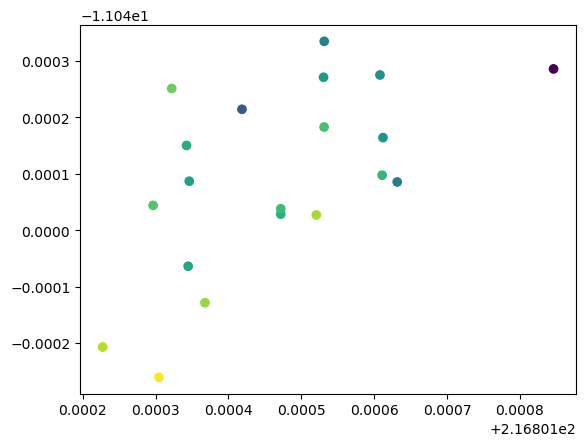

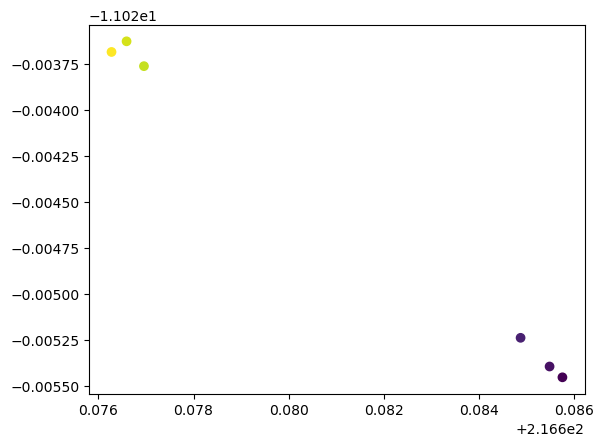

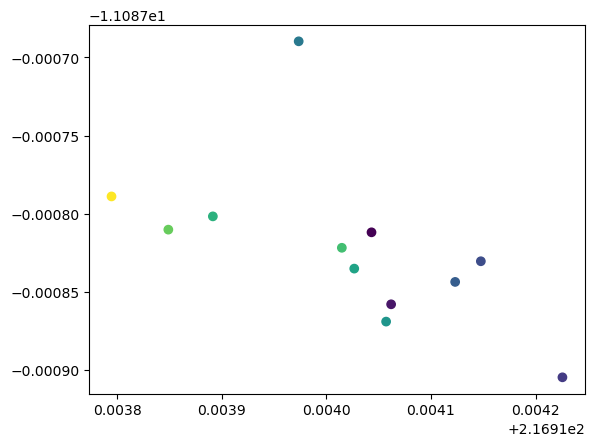

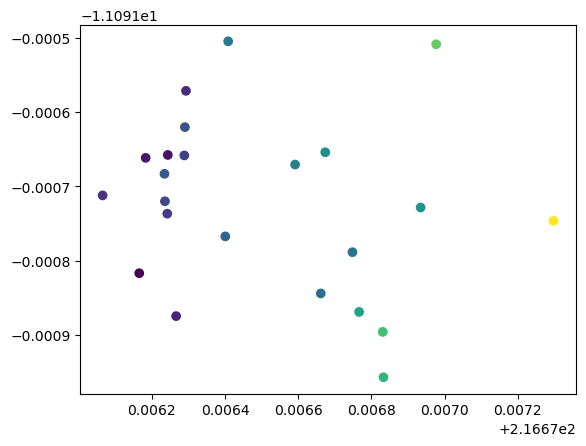

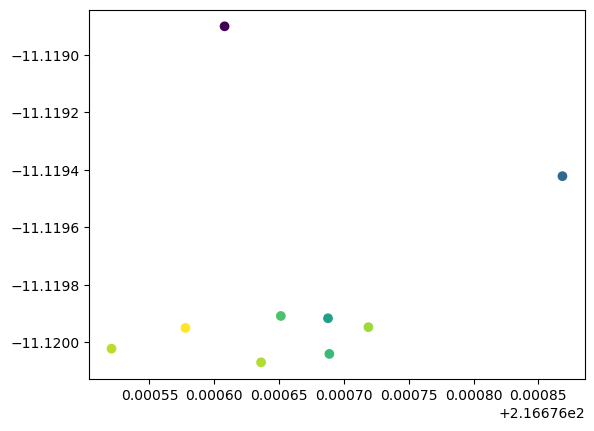

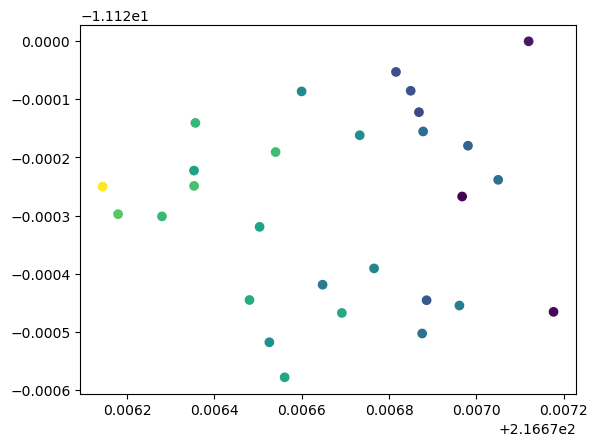

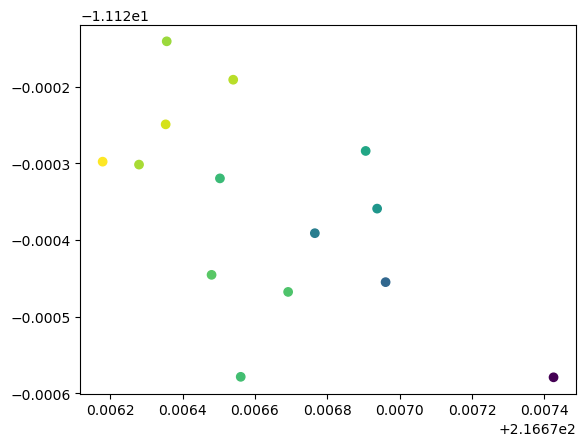

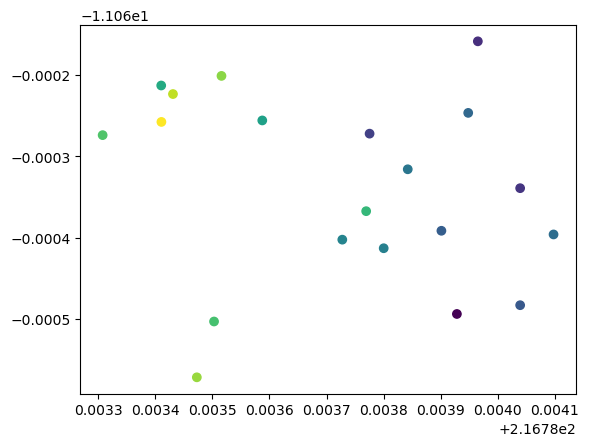

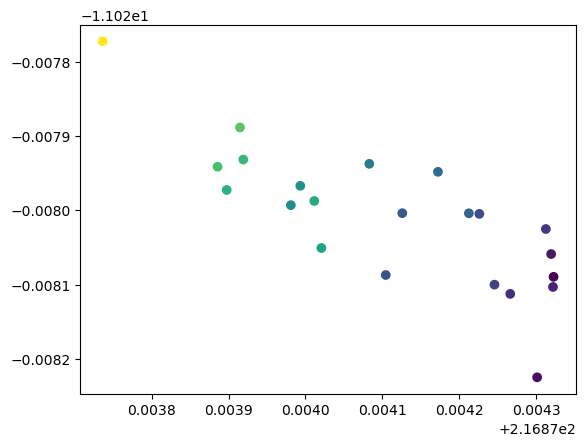

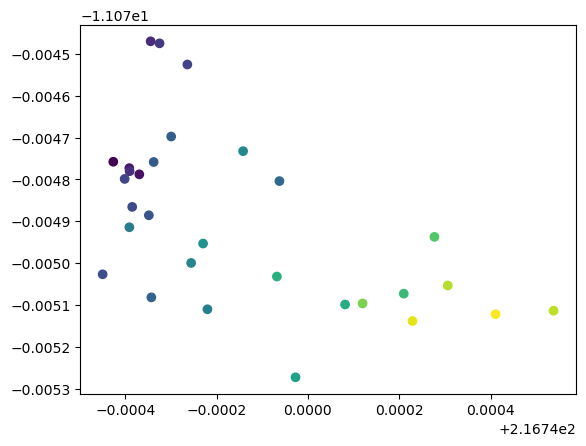

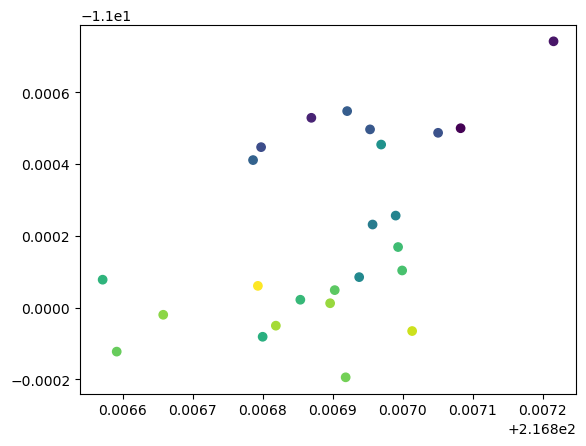

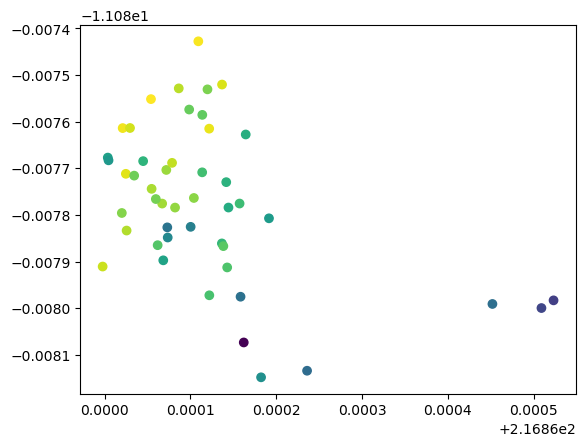

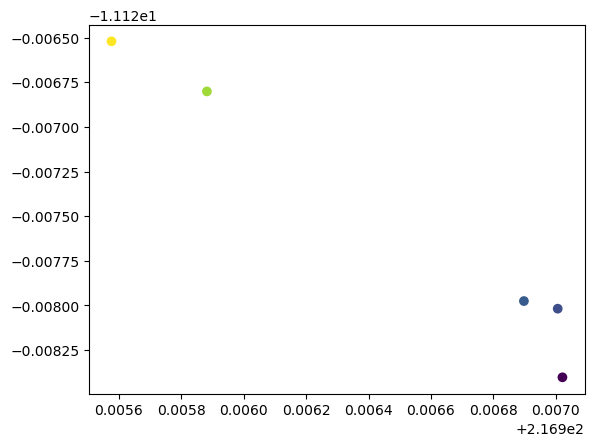

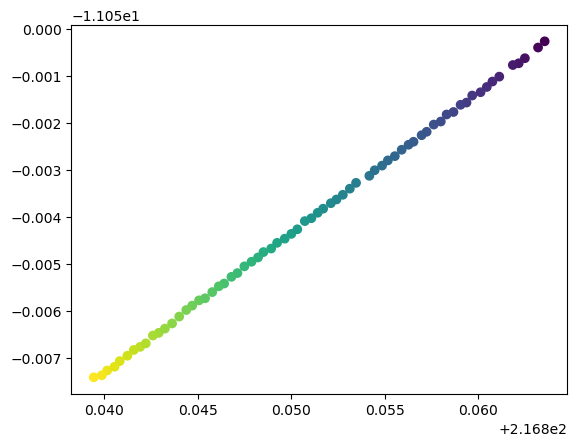

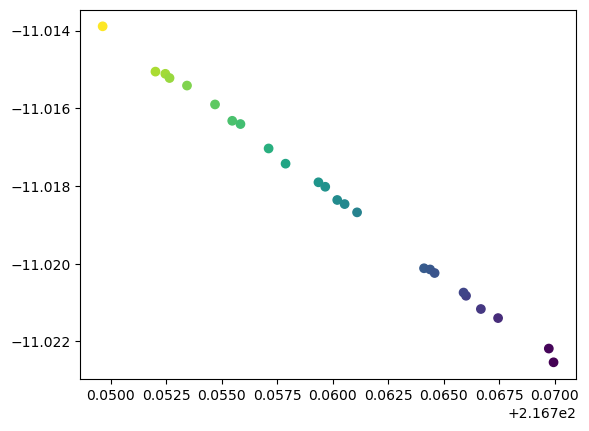

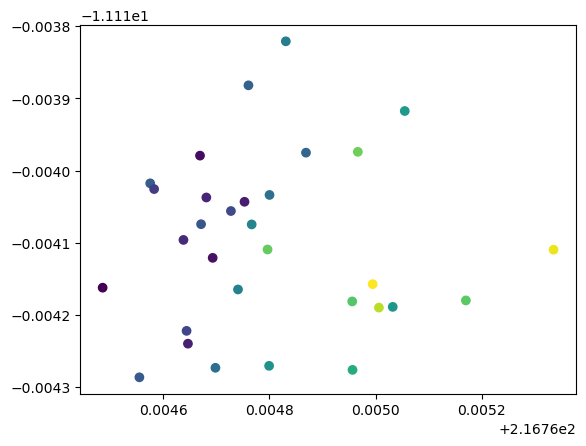

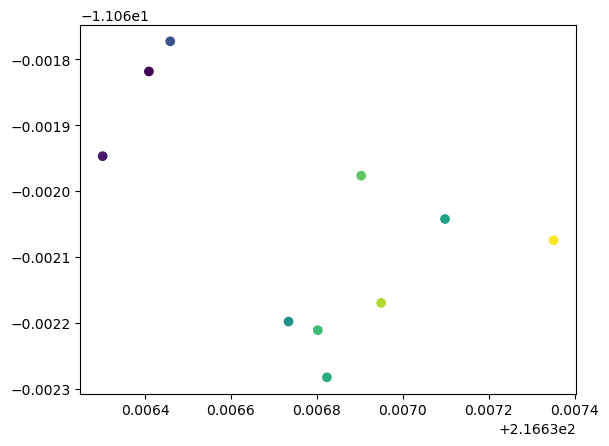

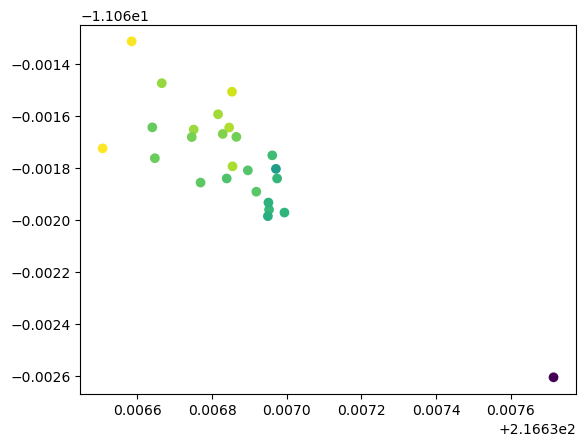

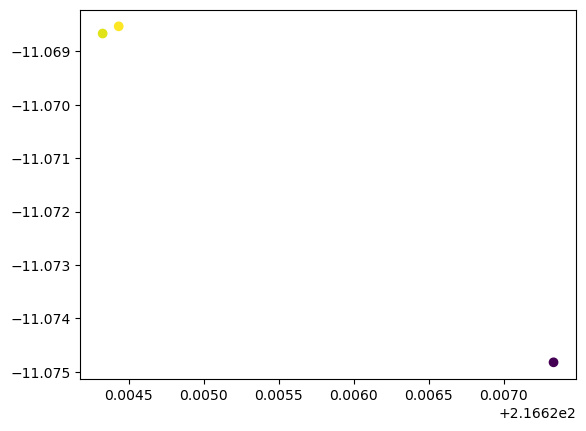

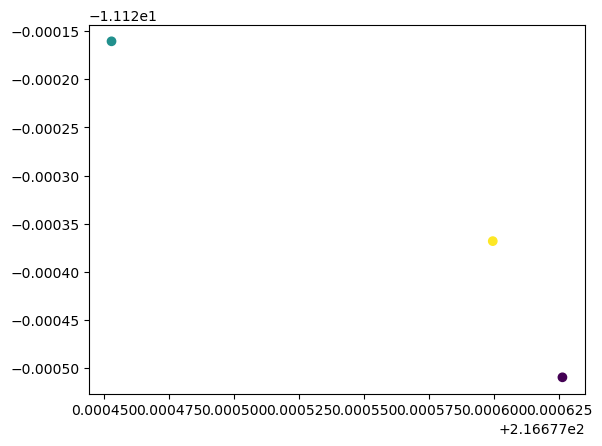

/nvme/users/stevengs/opt_lsst/conda/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


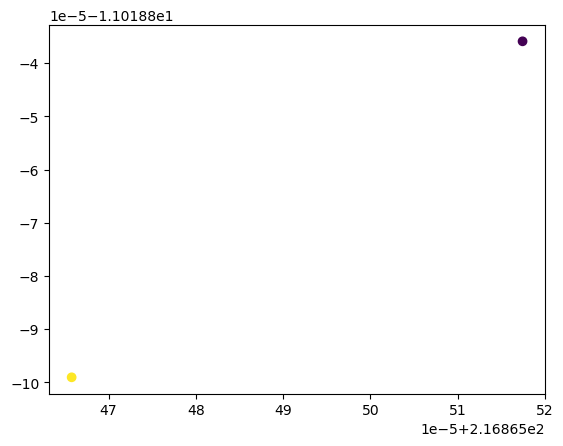

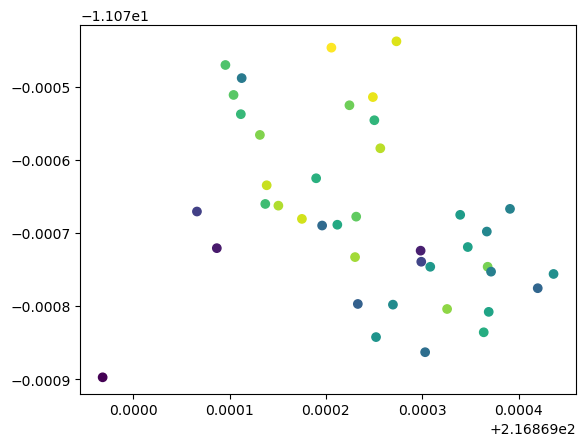

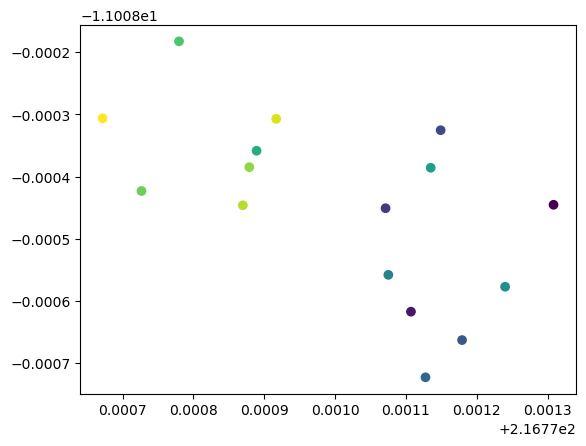

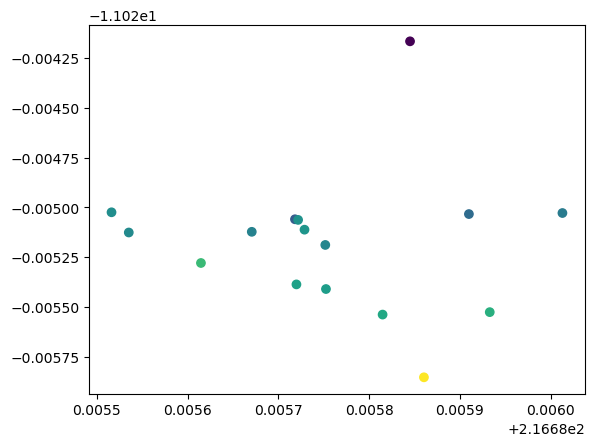

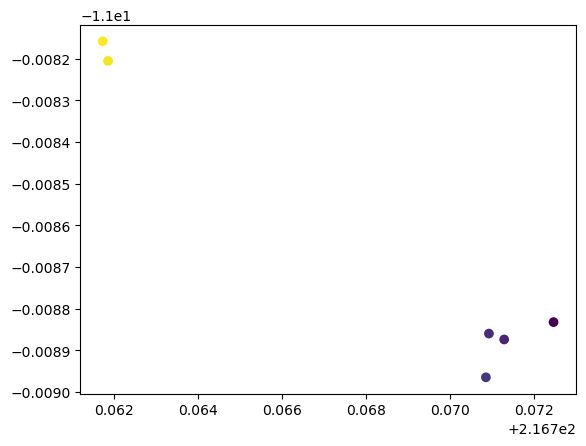

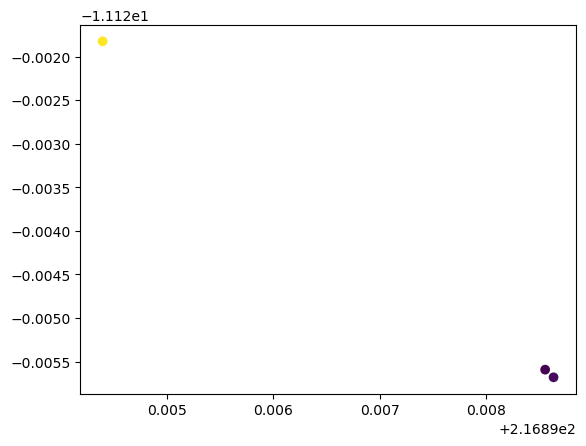

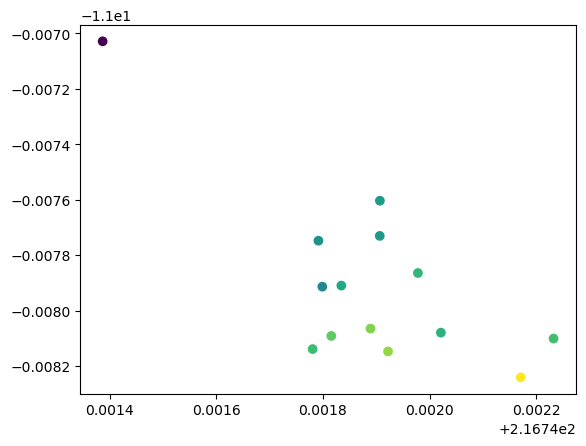

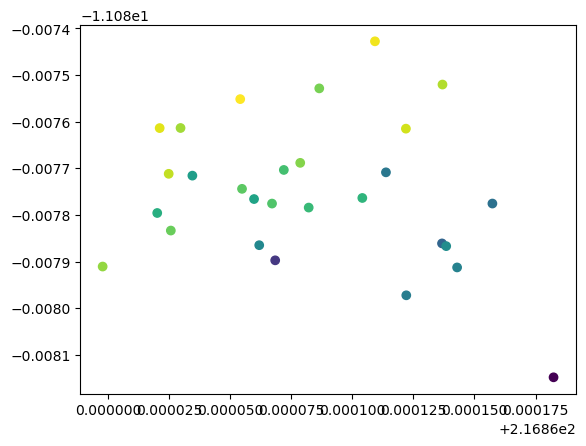

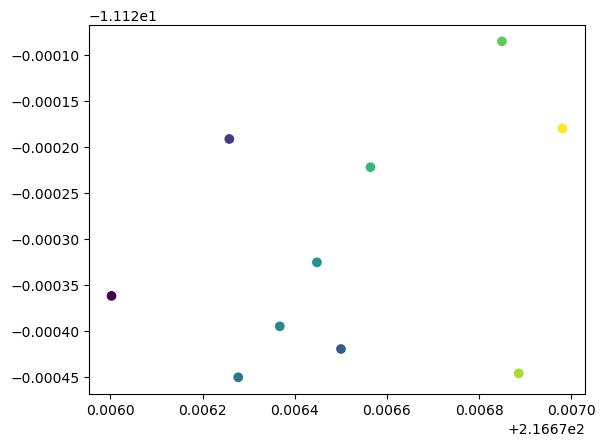

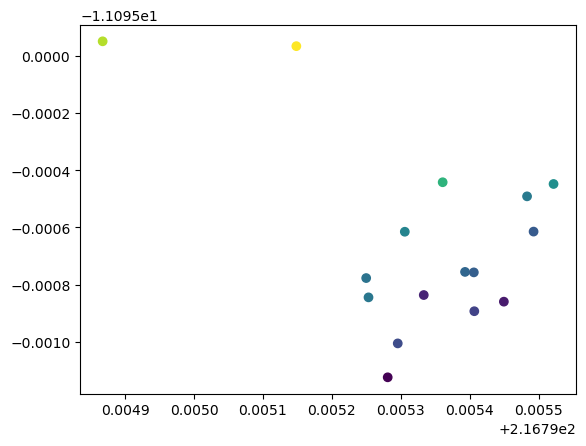

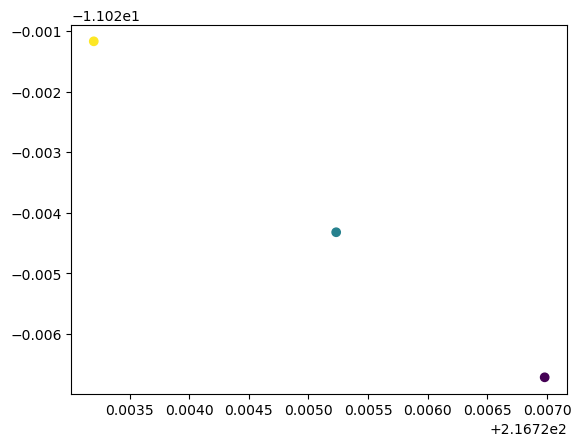

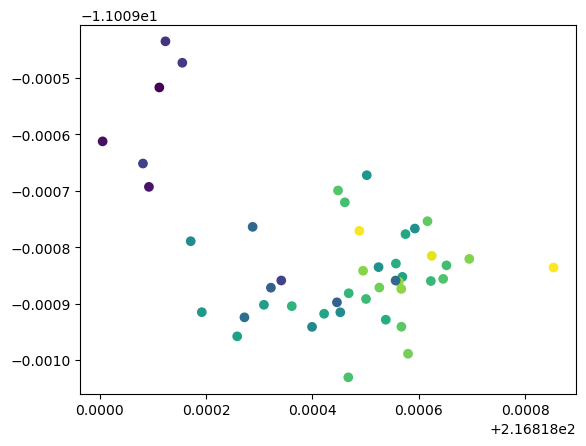

In [9]:
for cluster in refined:
    plot_cluster(cluster)
    plt.show()

In [7]:
cluster

array([False, False, False, ..., False, False, False])